# ✨ **Previsão de Fraudes em Cartão de Crédito**
Projeto de um problema de classificação com Machine Learning em dados desbalanceados.

## ◽ **O Problema** 

Fraudes em cartões de créditos é um dos principais problemas que instituições oferecedoras de crédito tem. Tais fraudes causam muitos prejuízos para as operadoras, e em uma escala muito alta! Precisamos de uma solução para identificar de antemão quem são esses fraudadores!

## ◽ **O Objetivo** 
Propor um modelo para prever fraudes na passagem de um cartão de crédito. Esse modelo deve levar em consideração o contexto de negócio das operadoras de cartão. 

## ◽ **As Etapas do Projeto** 
## 1. Obtenção e Importação dos Dados
## 2. Análise Exploratória dos Dados
## 3. Pré-processamento dos Dados
## 4. Processo de Modelagem
## 5. Considerações Finais

---
# ◾ **Etapa 1.** Obtenção e Importação dos Dados

Origem dos dados:

https://www.kaggle.com/mlg-ulb/creditcardfraud

## ◽ Explicação dos dados

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## ◽ **Importação dos Dados** 

In [50]:
# importação dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
                             f1_score, roc_auc_score, confusion_matrix, \
                             classification_report

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import PrecisionRecallDisplay 

In [2]:
# visualização de uma amostra dos dados 
caminho = 'creditcard.csv' 
dados = pd.read_csv(caminho)  
dados.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11925,20558.0,1.151331,0.085321,0.930061,1.432405,-0.625299,-0.162422,-0.571394,0.126638,1.914226,...,-0.024427,0.132488,-0.006082,-0.040151,0.333934,-0.292094,0.016171,0.017773,10.00,0
244802,152493.0,2.029468,0.131853,-1.769873,0.558776,0.116955,-1.476594,0.215636,-0.321506,0.723076,...,0.190752,0.669994,-0.012327,-0.110418,0.203973,-0.096180,-0.005632,-0.029790,12.50,0
45452,42353.0,-1.295231,1.110369,1.228909,-1.971236,-0.168816,-1.479347,0.720403,0.306950,-0.416187,...,-0.153420,-0.661357,-0.192481,0.425549,0.394452,1.043591,-0.020964,0.019566,7.47,0
92537,63978.0,-6.836737,-8.229308,1.609083,1.600438,8.924406,-6.146091,-5.054573,0.829718,0.451361,...,0.833777,-0.312843,1.397250,-0.363687,0.624570,-0.608021,-0.238501,0.279491,3.92,0
168924,119443.0,1.283984,-1.534375,-1.356663,0.483582,-0.775407,-0.702011,0.328103,-0.156901,0.984391,...,0.098697,-0.385932,-0.092286,0.074795,-0.286254,-0.148644,-0.105894,-0.004079,371.20,0
252453,155814.0,1.950983,0.000624,-2.166118,0.442471,0.671909,-0.813608,0.471004,-0.314592,0.310732,...,-0.198040,-0.587700,0.133957,0.351375,-0.048363,0.345113,-0.084648,-0.024923,77.00,0
99703,67244.0,1.172378,0.225871,1.227205,2.526234,-0.565634,0.357889,-0.599728,0.198890,0.114973,...,0.061860,0.274552,-0.104807,-0.145818,0.447854,0.141605,0.034697,0.027535,1.00,0
31972,36587.0,-3.669883,-2.139424,-1.484985,0.016833,-0.655260,-0.620690,1.444137,0.244819,-0.317681,...,-0.007764,-0.099469,-0.618232,-0.216701,-0.461477,0.869934,0.674782,-0.807877,598.00,0
259657,159216.0,1.695574,-0.840929,-0.383004,0.328124,-0.899416,-0.459672,-0.466069,-0.032460,0.721526,...,0.324349,0.753596,0.064634,0.150645,-0.428373,0.610179,-0.062196,-0.032596,145.00,0
158731,111688.0,2.204901,-0.383002,-1.770500,-0.624965,-0.288853,-1.599004,-0.100463,-0.449161,-0.573475,...,-0.035089,-0.036944,0.168038,-0.040295,-0.003693,-0.282349,-0.023686,-0.034872,15.00,0


In [3]:
# informações dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# valores nulos ou em brancos dos dados
dados.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## ◽ Visualização da variável target

In [5]:
# distribuição dos valores da variável target, sendo 0 transações normais e 1 fraudes
dados['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# em porcentagem
dados['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

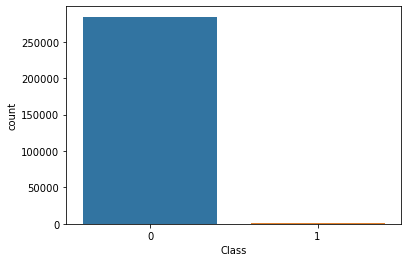

In [7]:
# graficamente
sns.countplot(x = dados['Class']);

---
# ◾ **Etapa 2.** Análise Exploratória dos Dados

                                             |                                             | [  0%]   00:00 ->…


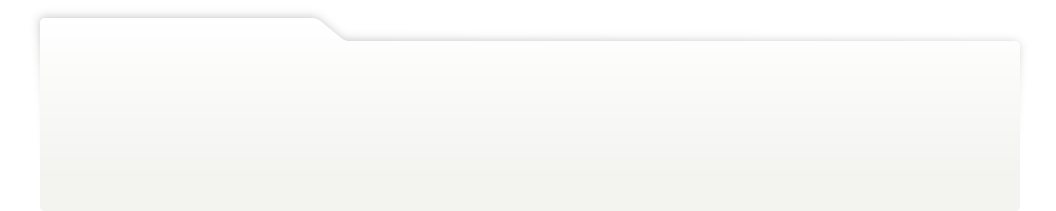
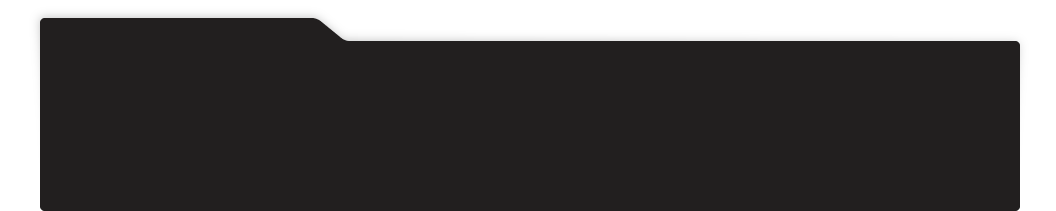
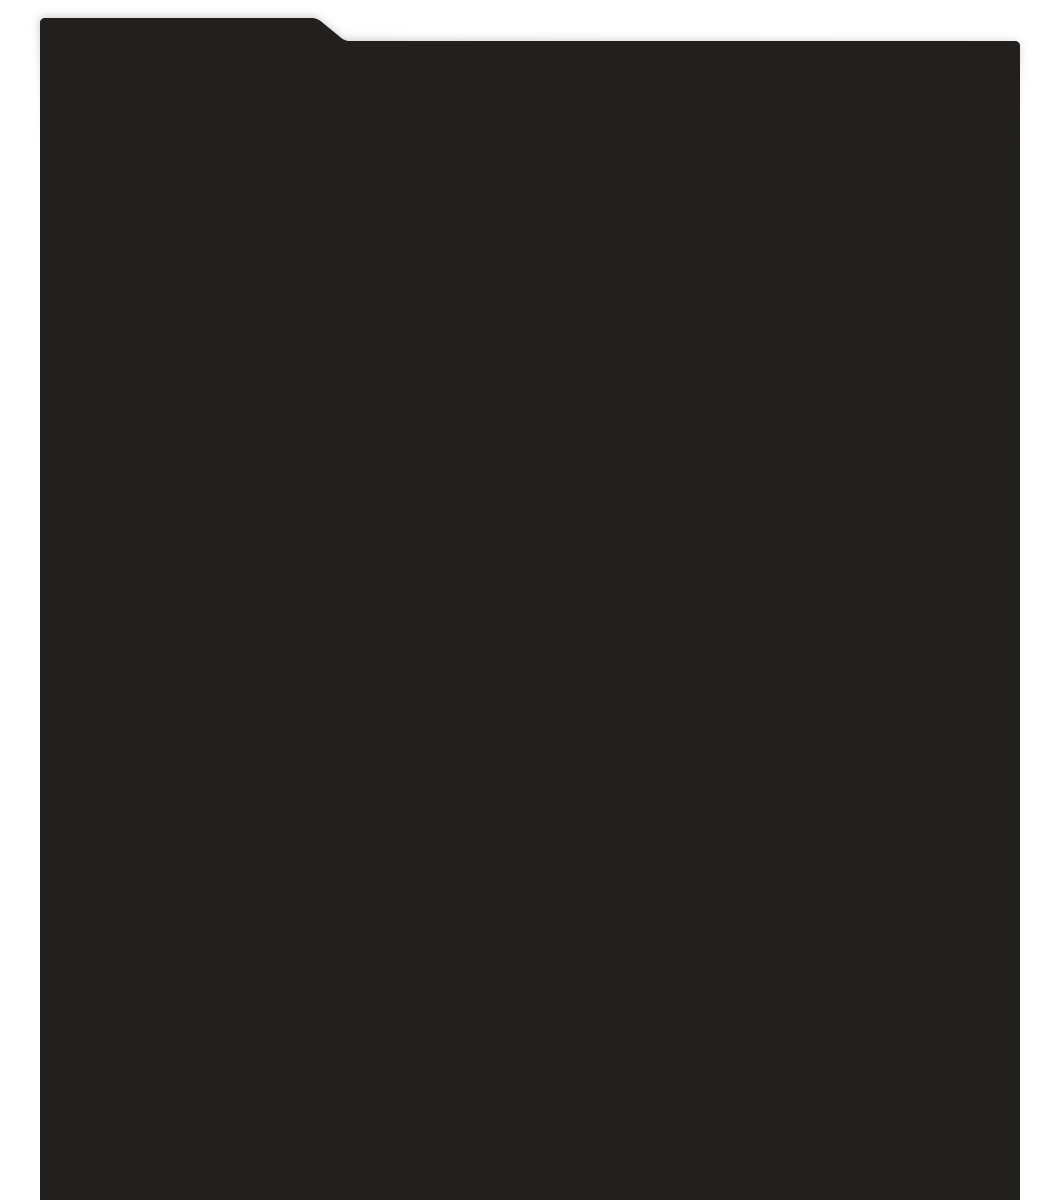
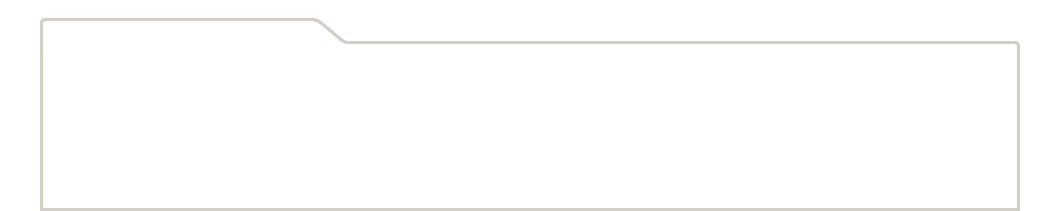
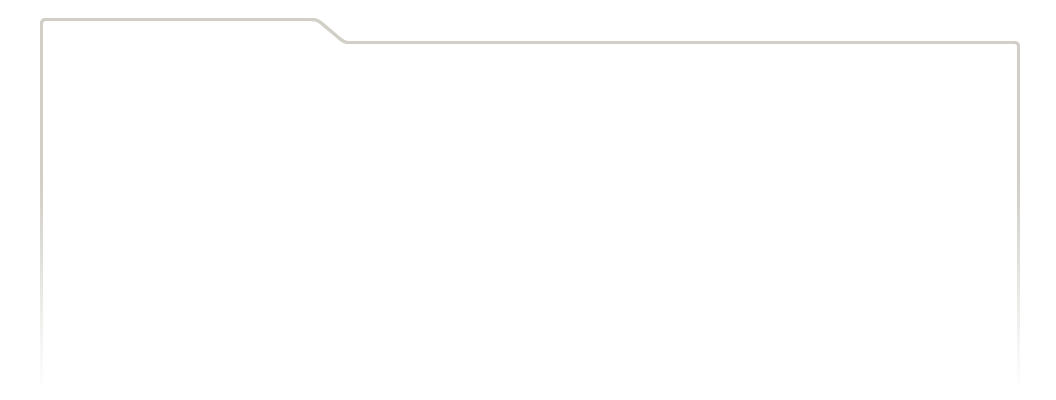
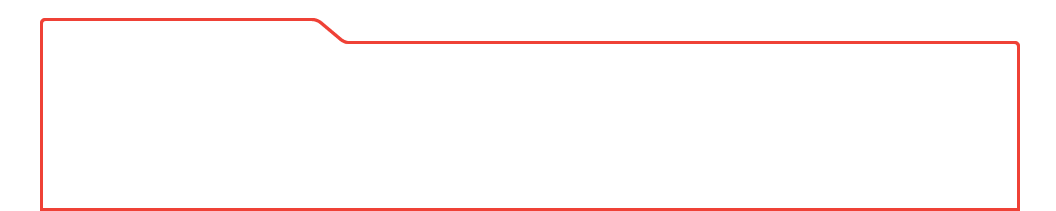
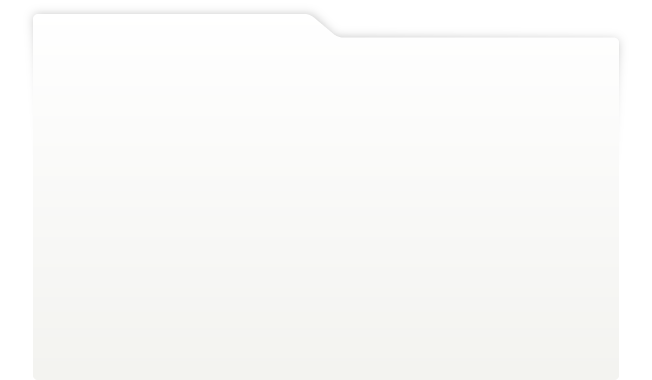
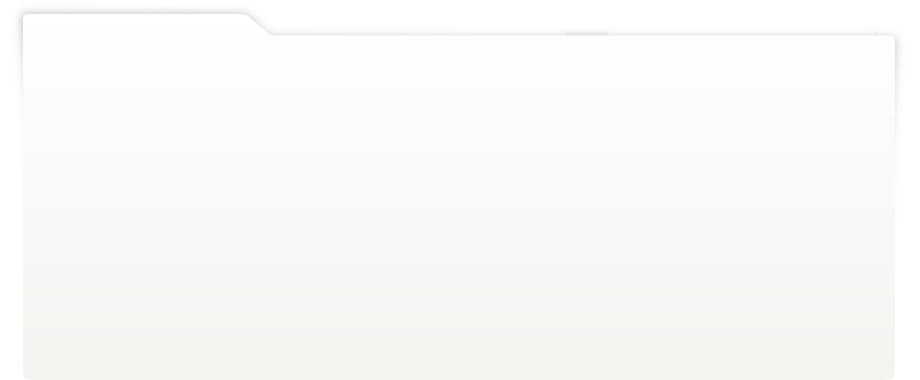
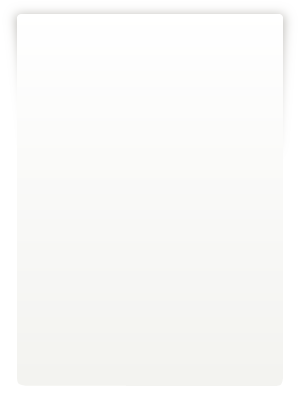
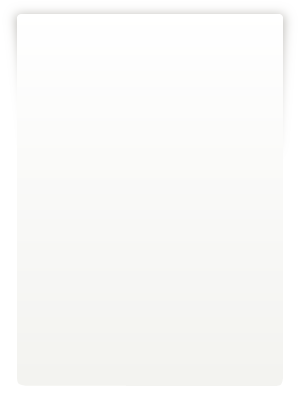
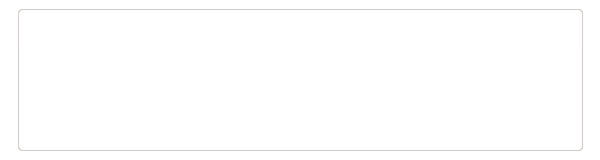
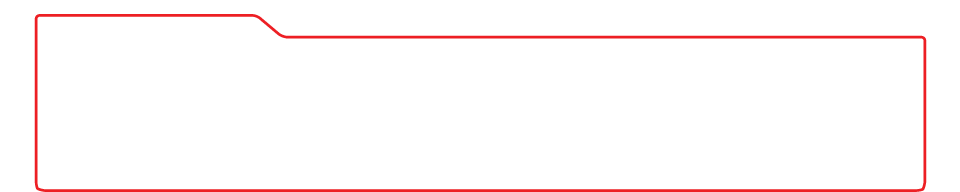
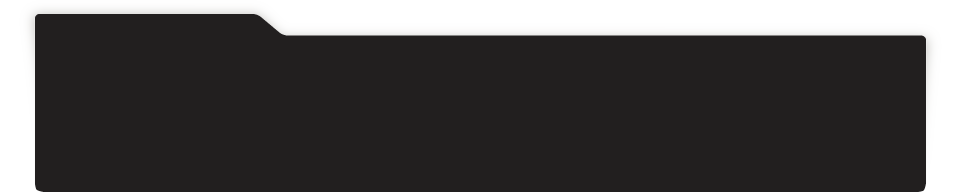
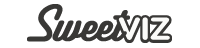
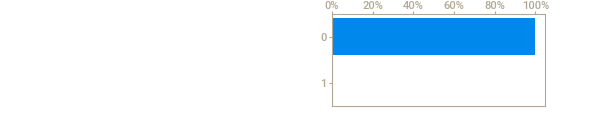
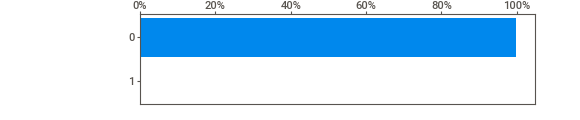
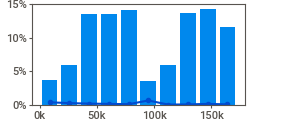
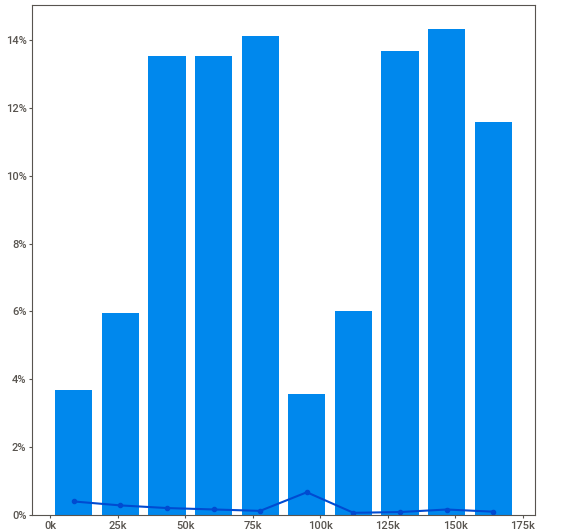
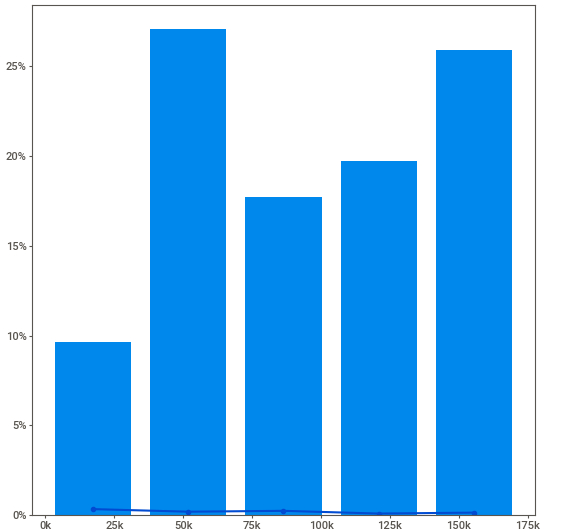
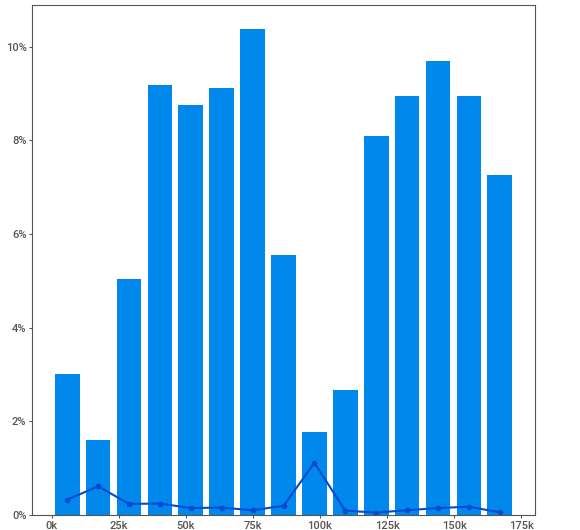
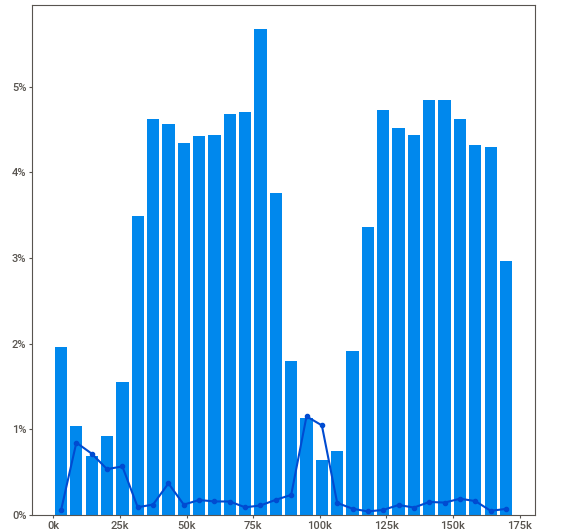
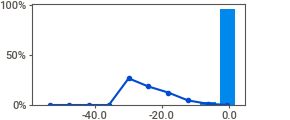
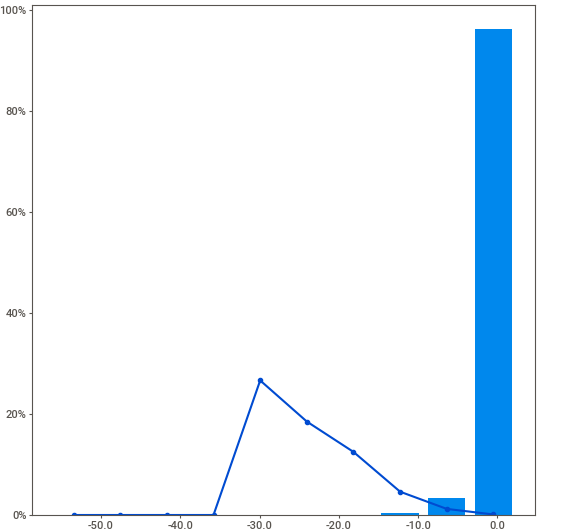
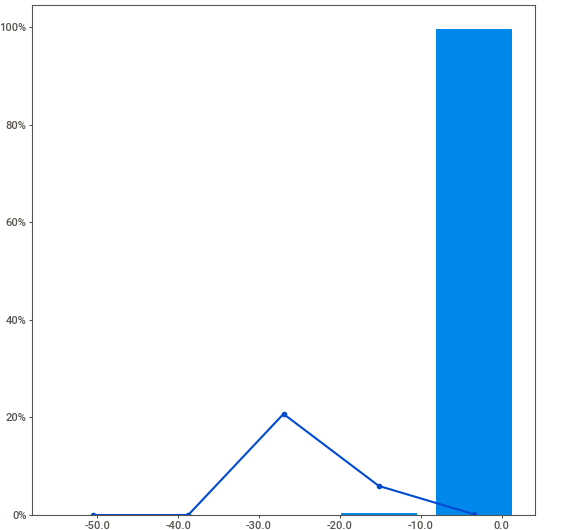
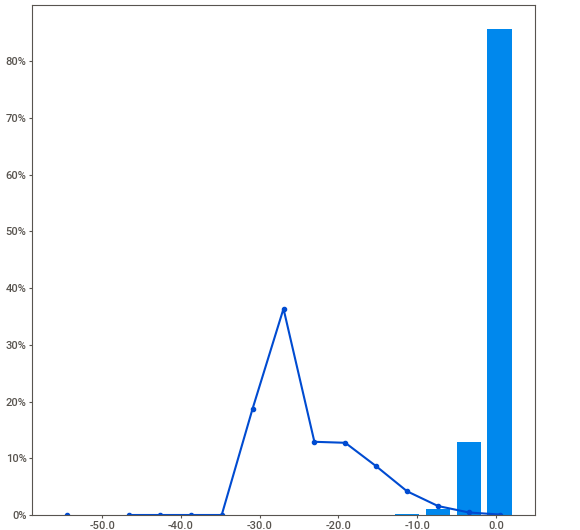
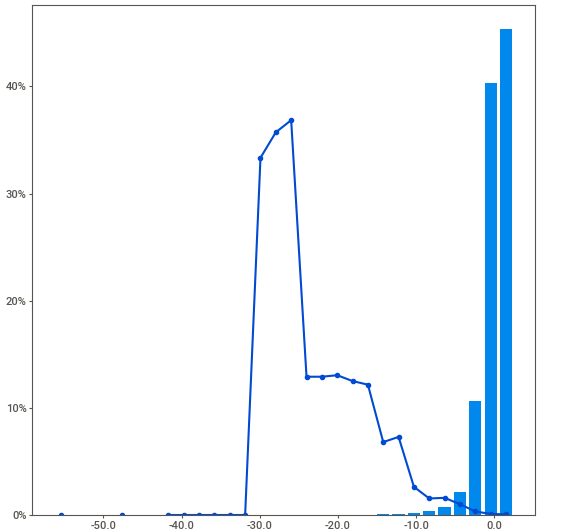
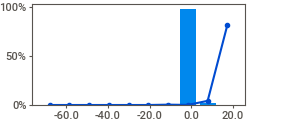
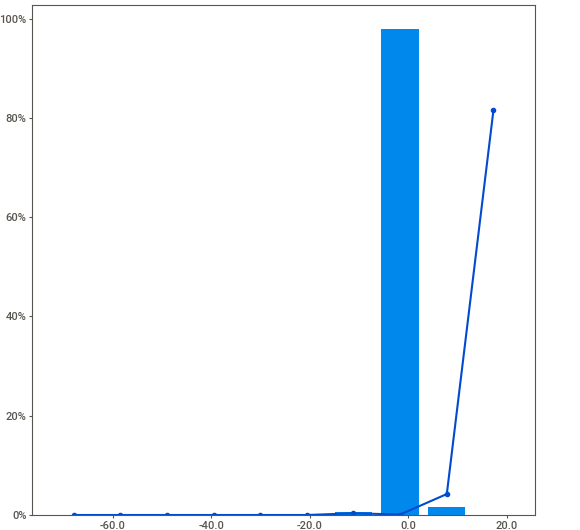
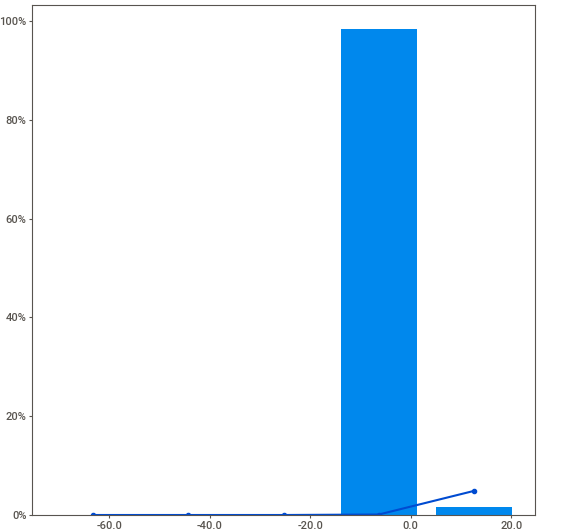
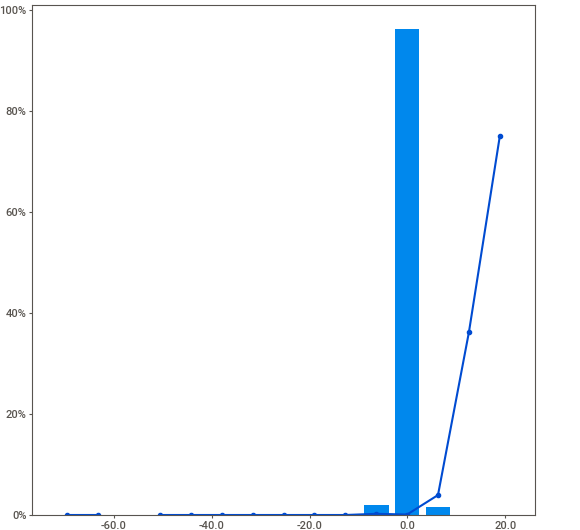
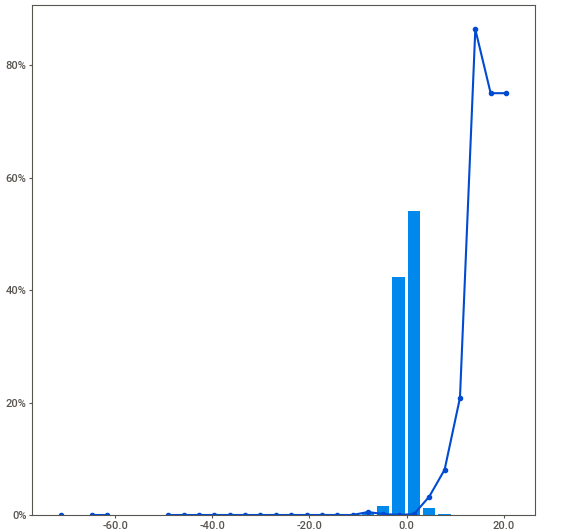
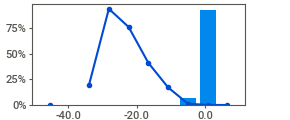
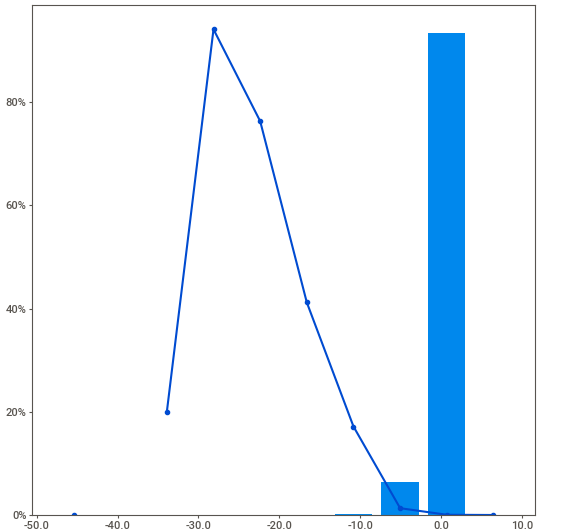
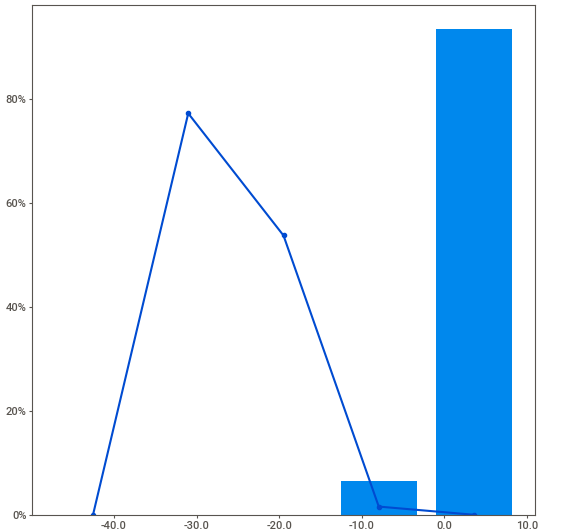
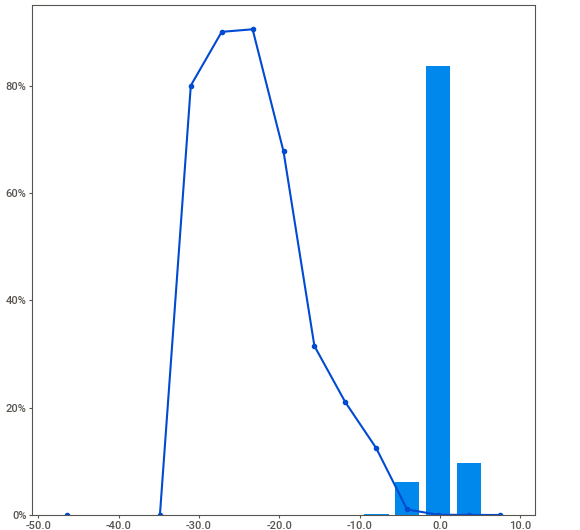
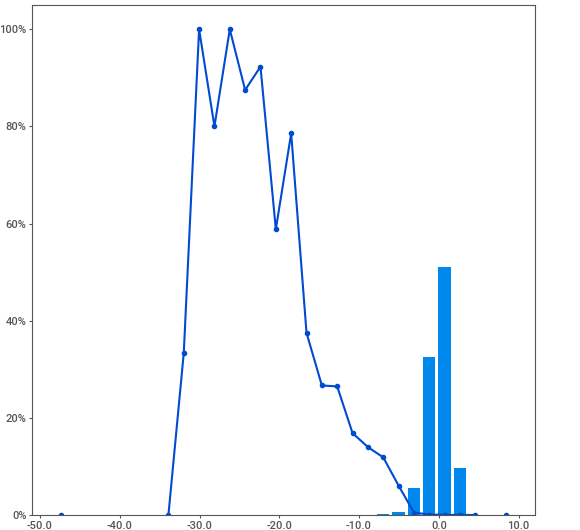
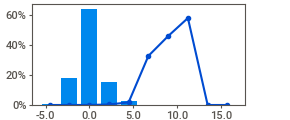
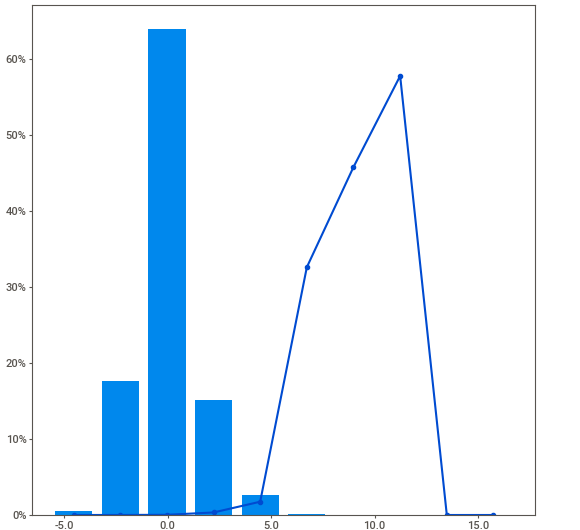
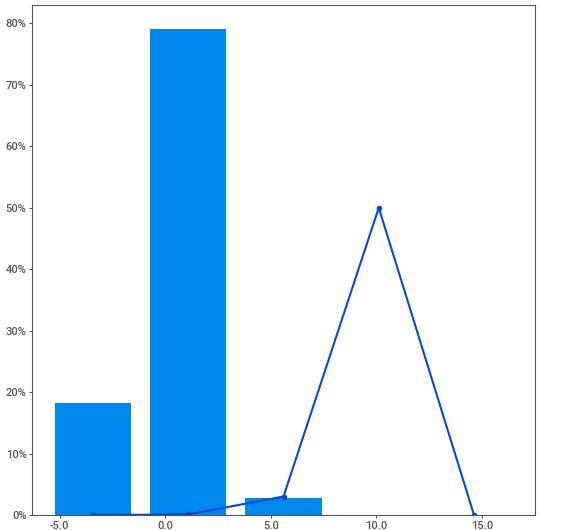
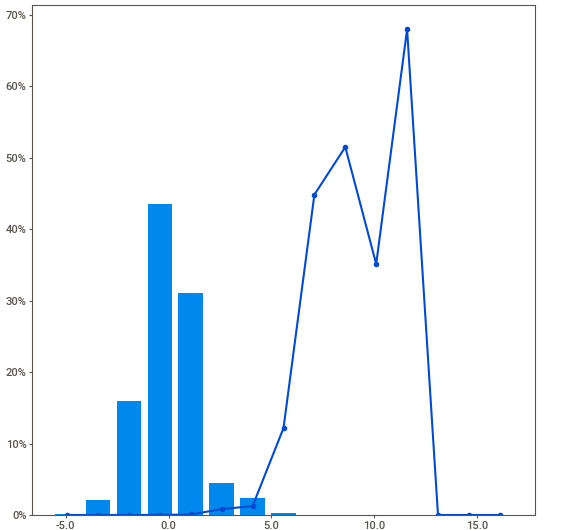
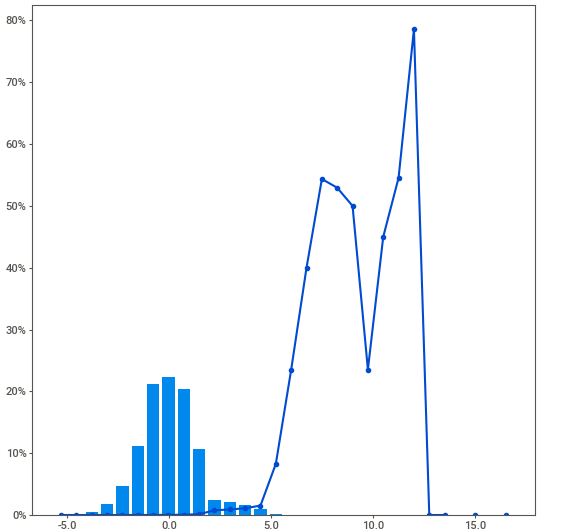
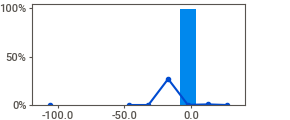
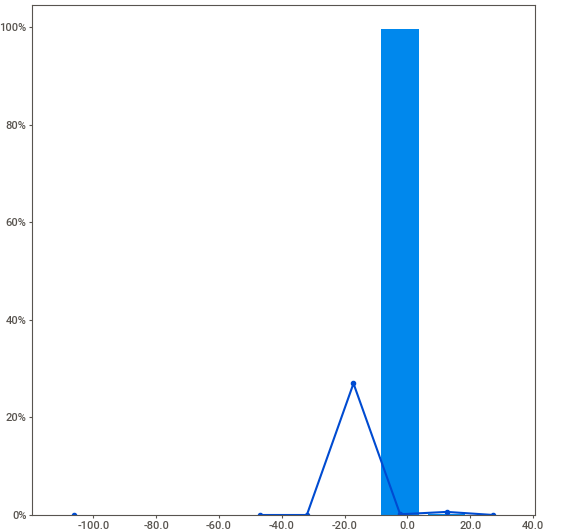
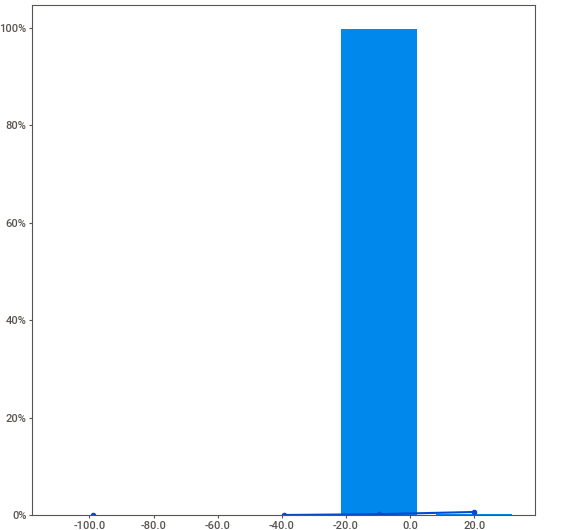
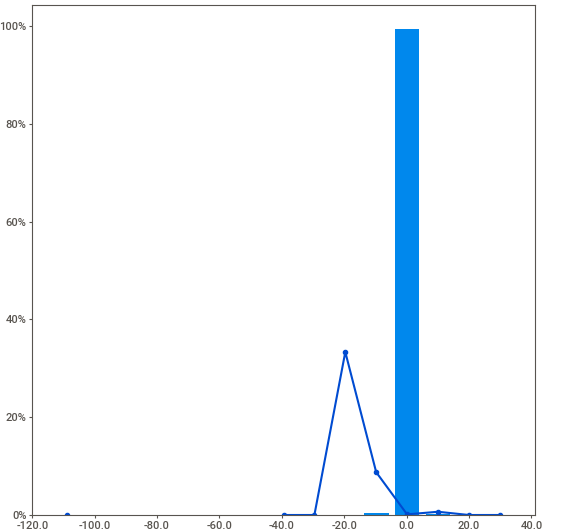
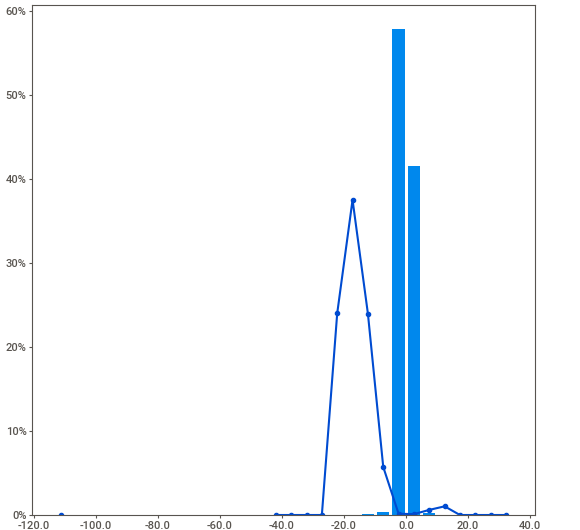
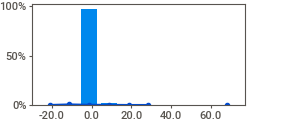
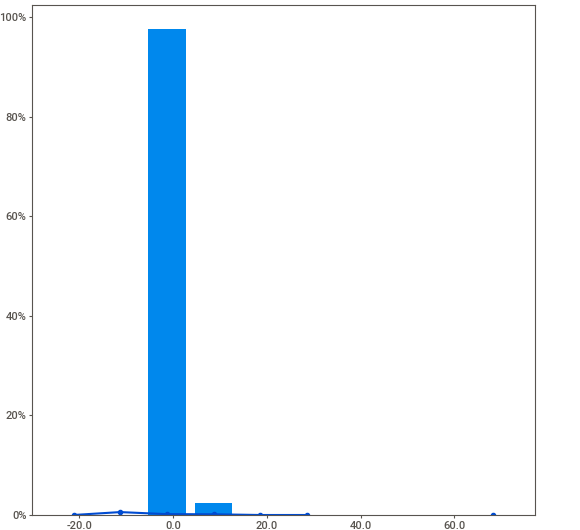
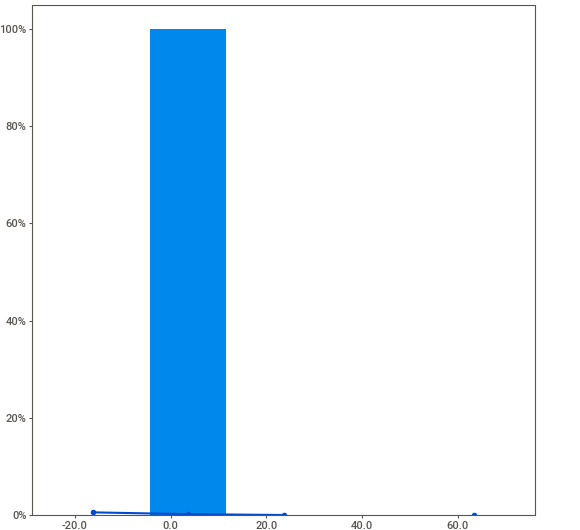
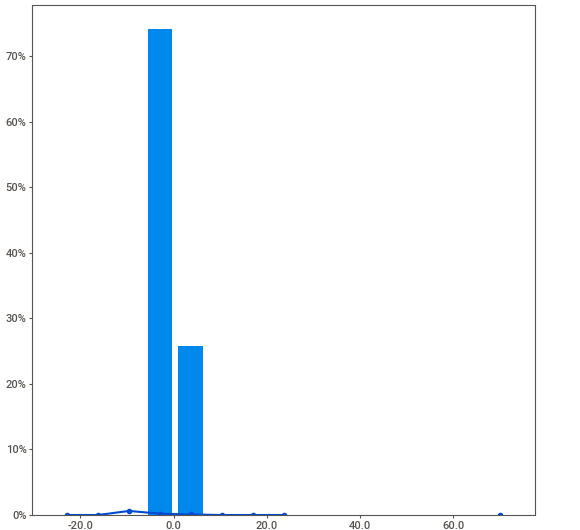
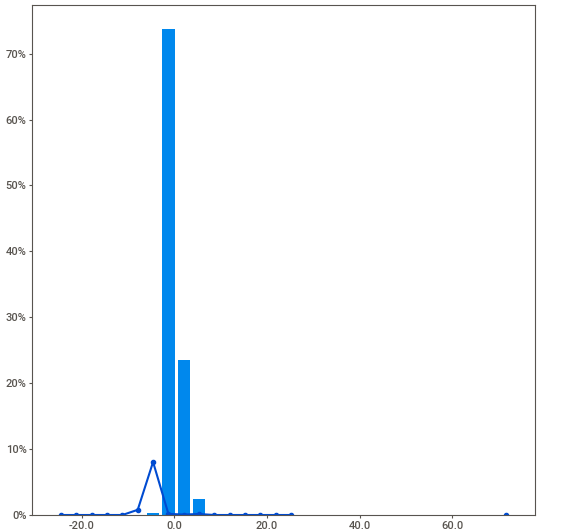
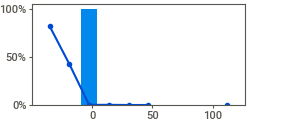
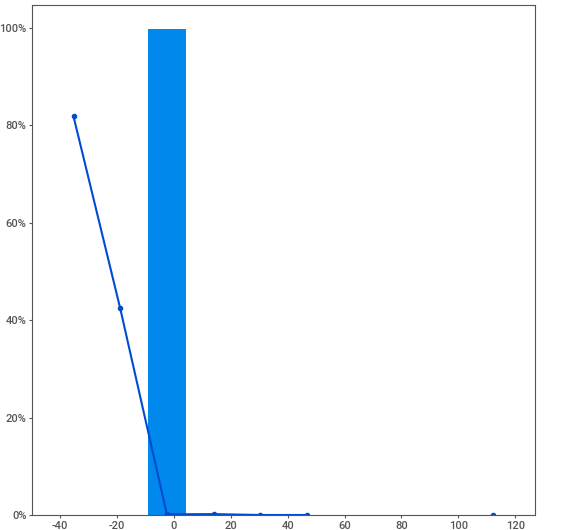
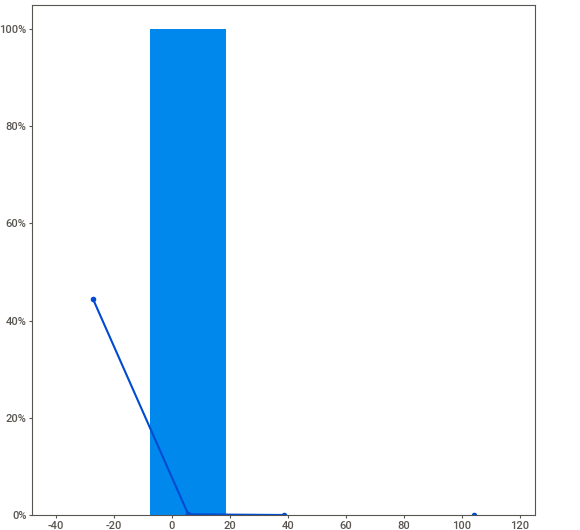
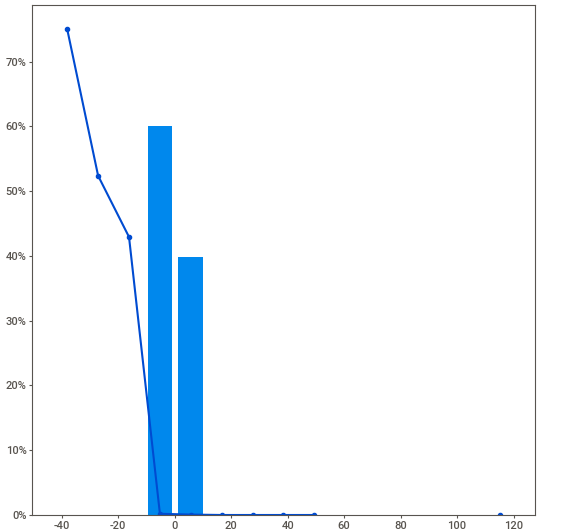
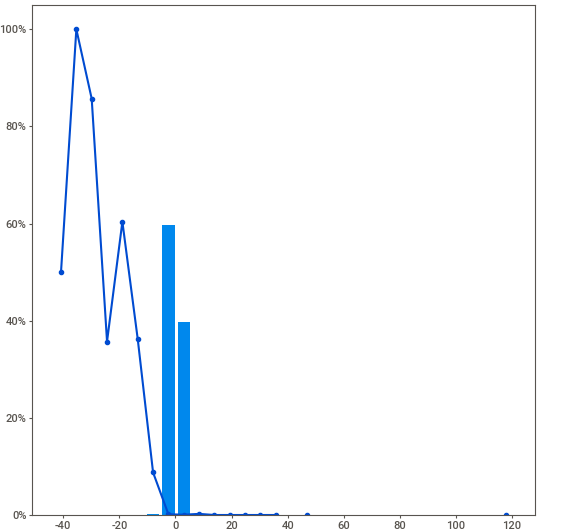
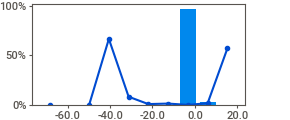
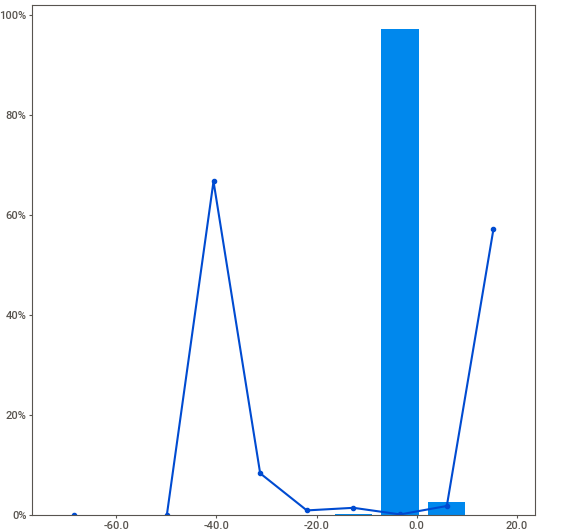
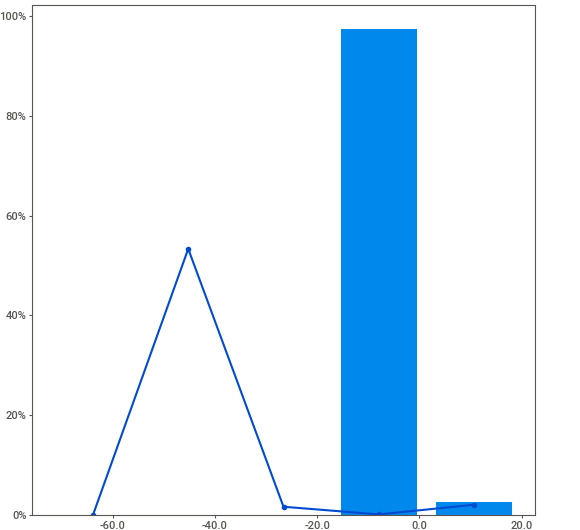
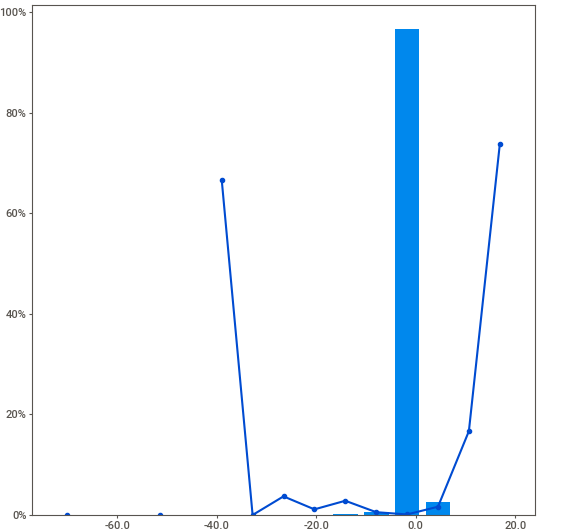
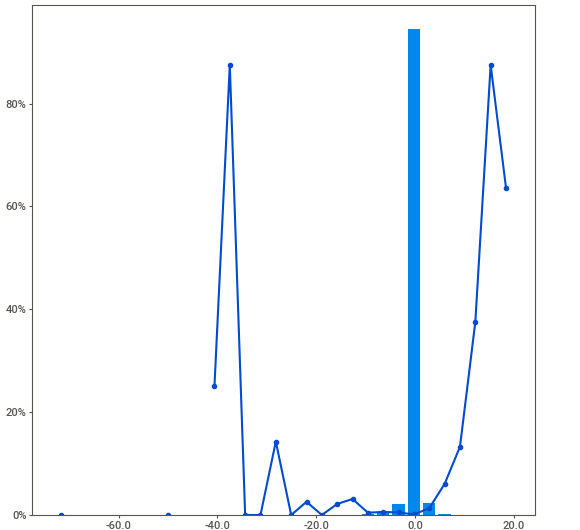
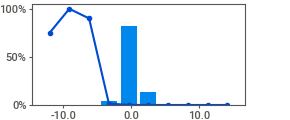
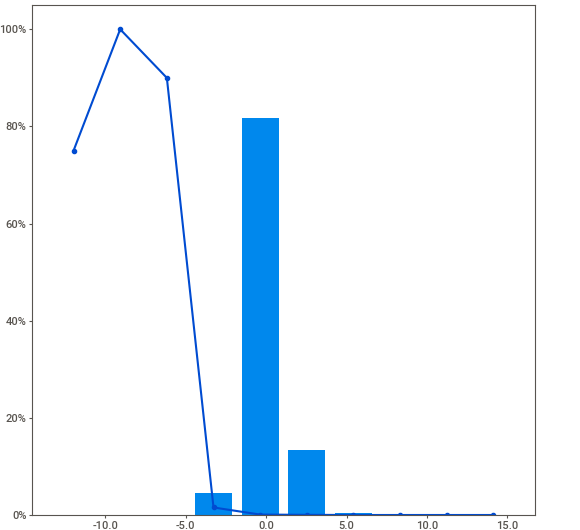
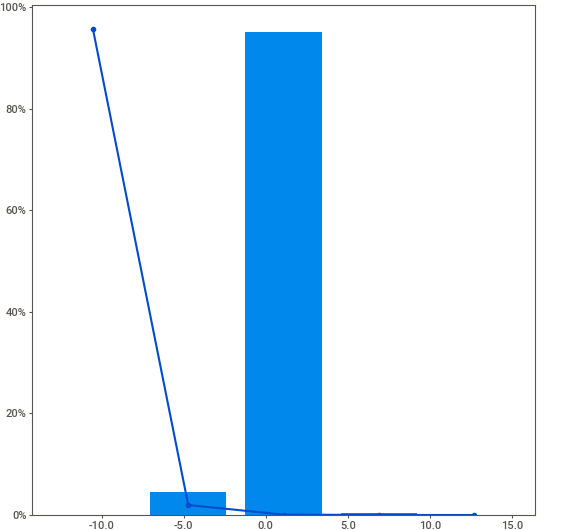
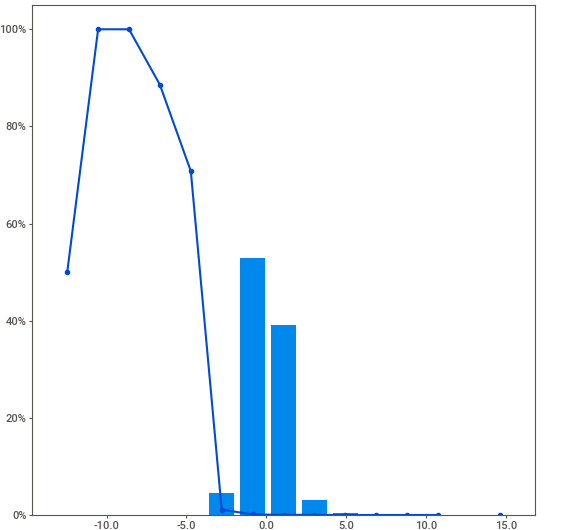
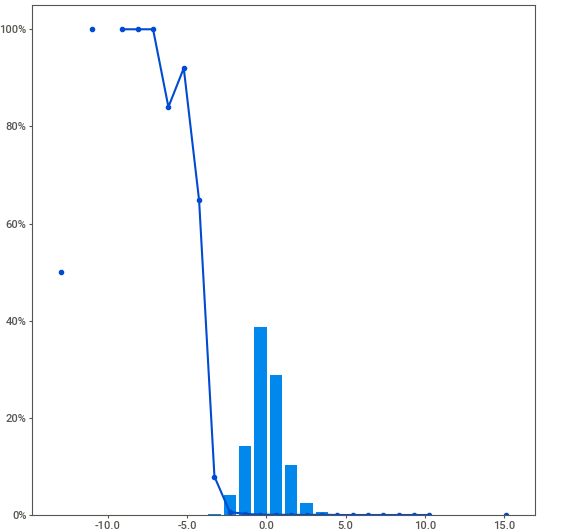
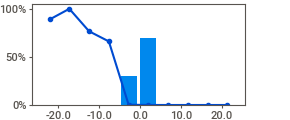
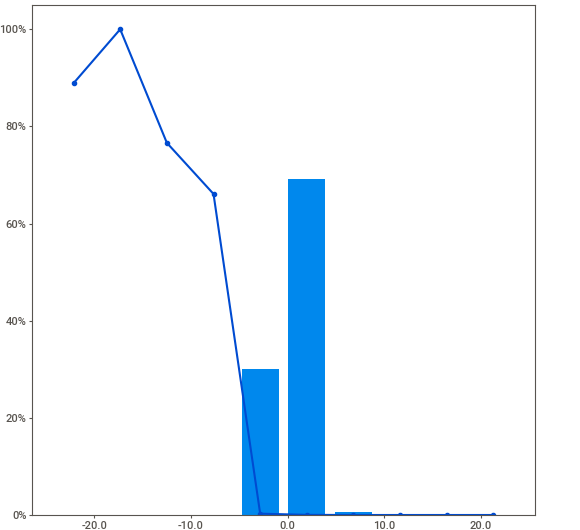
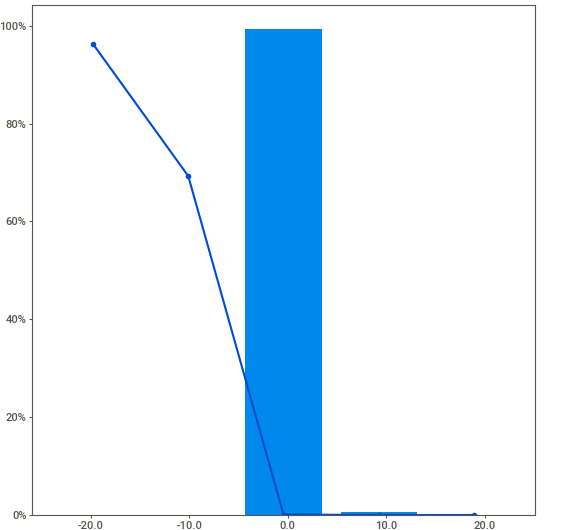
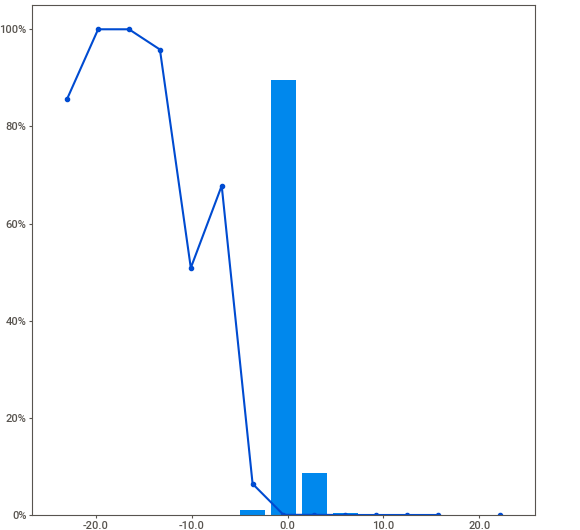
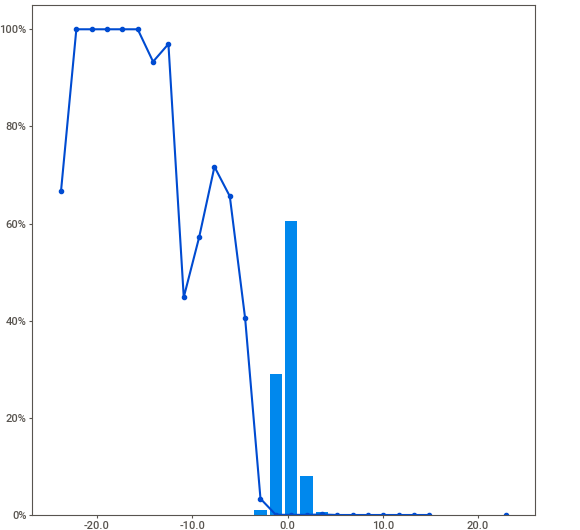
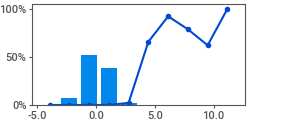
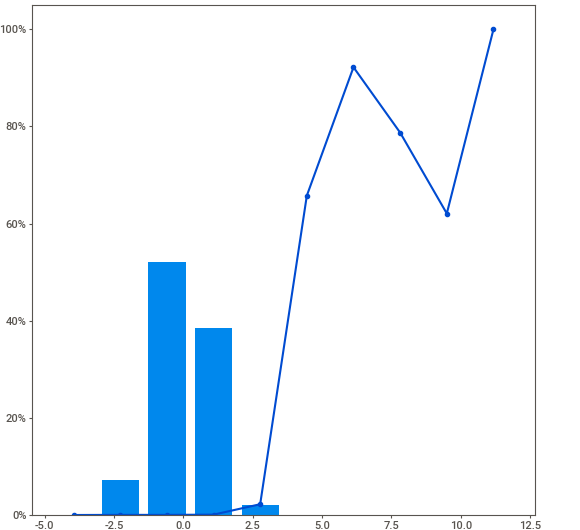
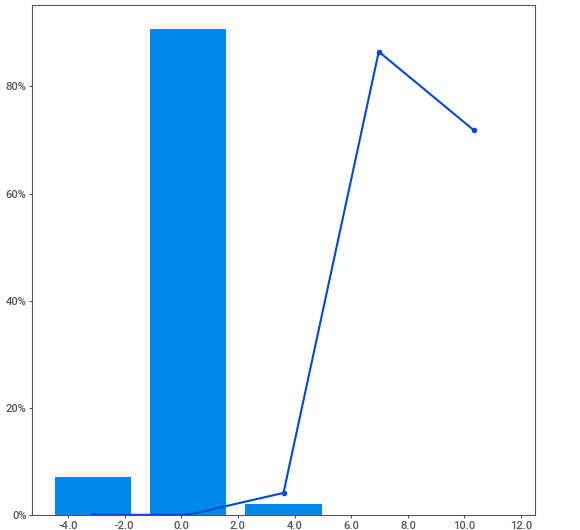
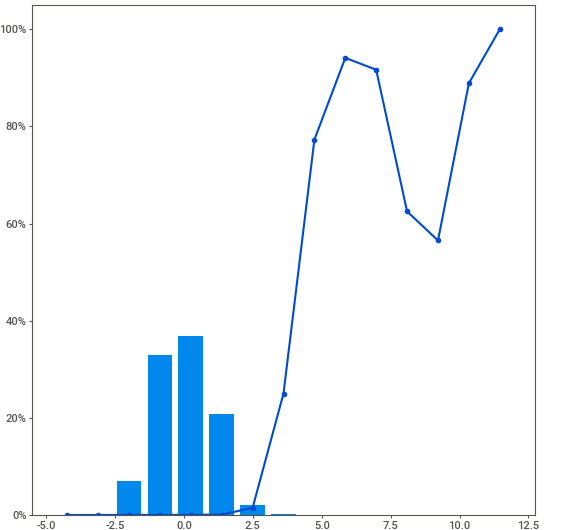
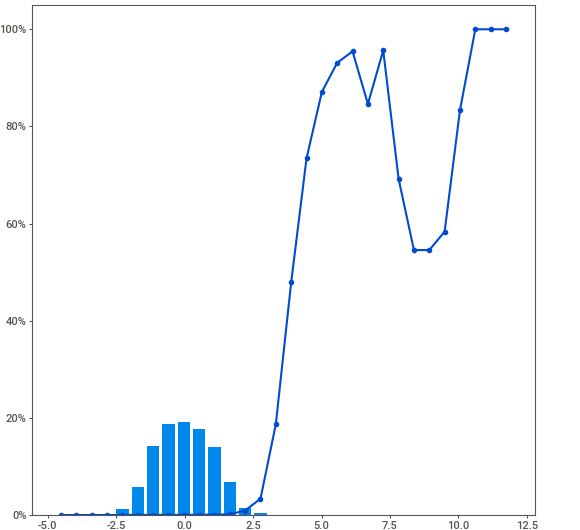
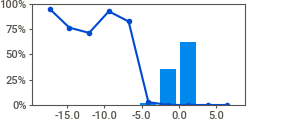
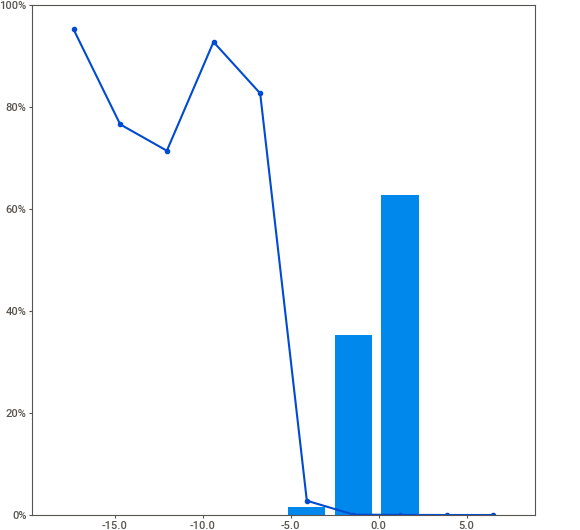
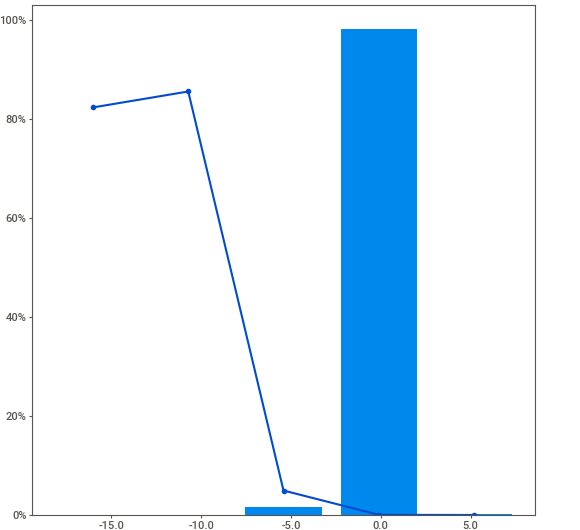
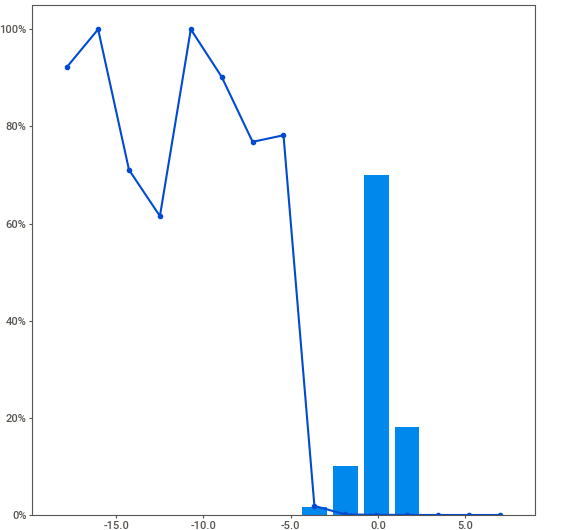
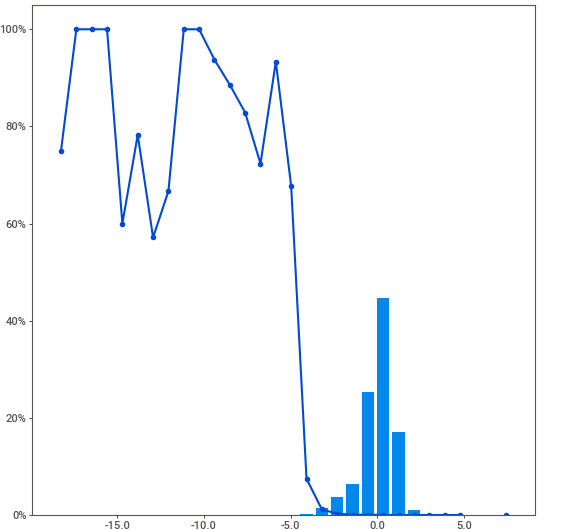
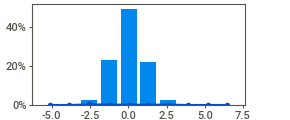
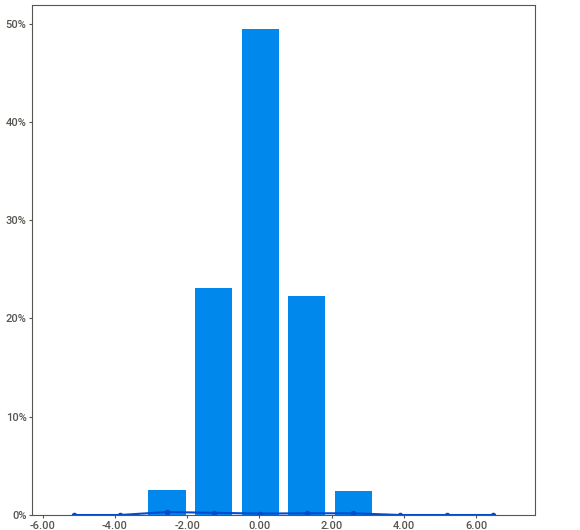
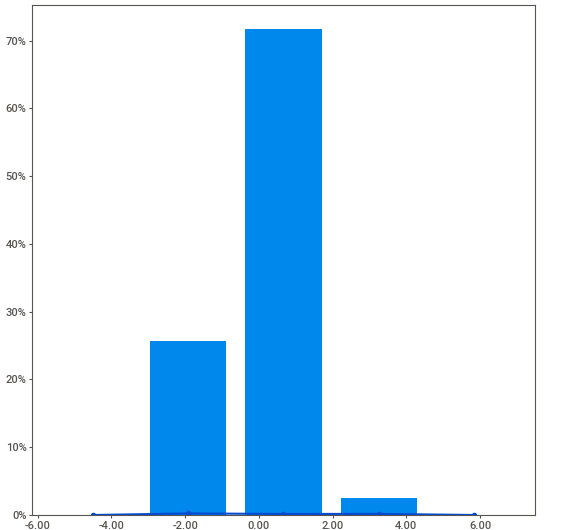
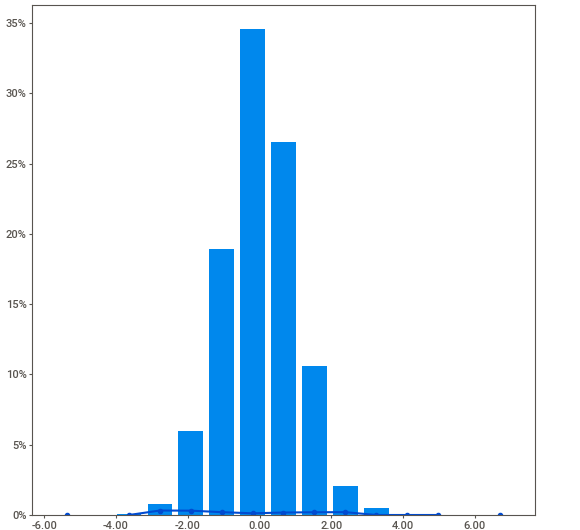
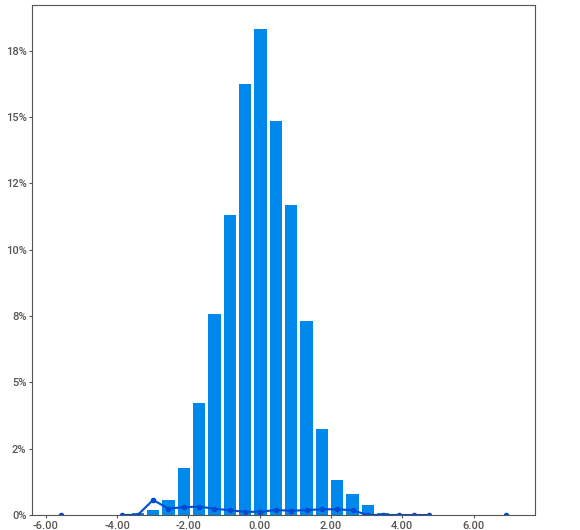
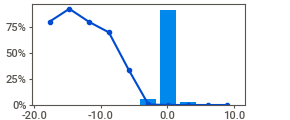
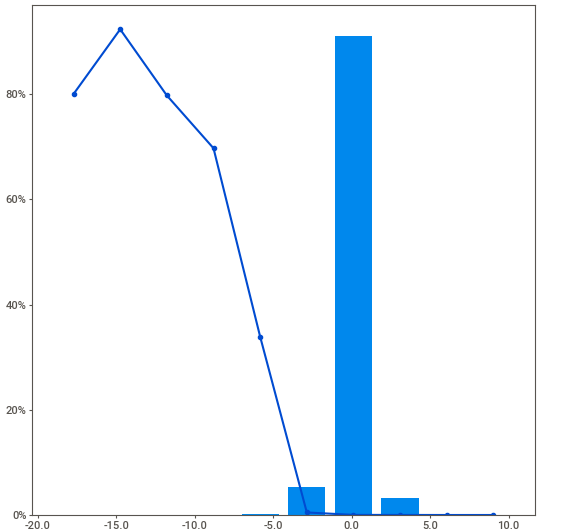
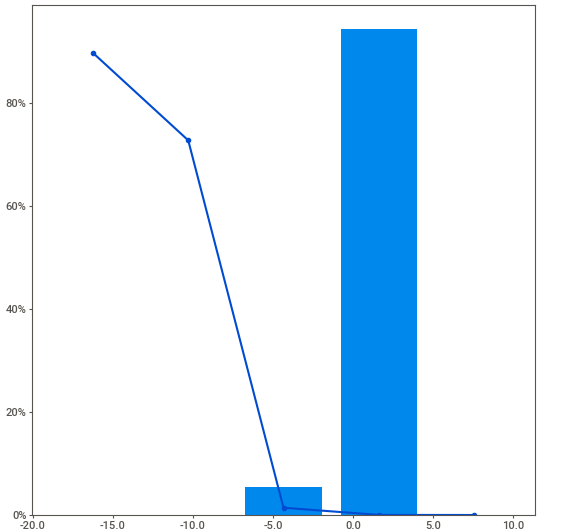
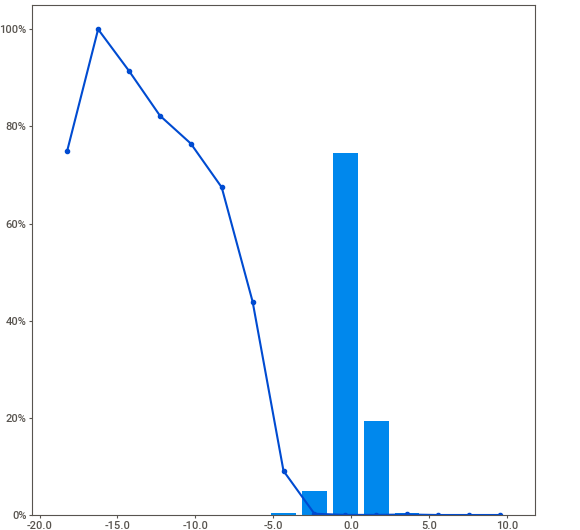
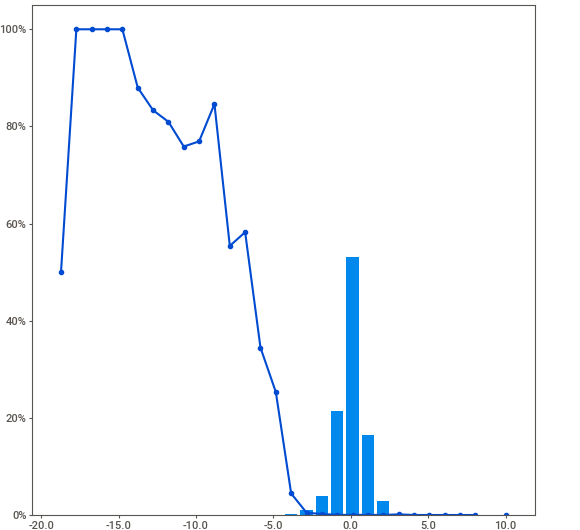
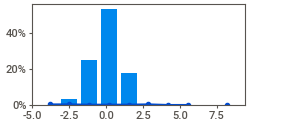
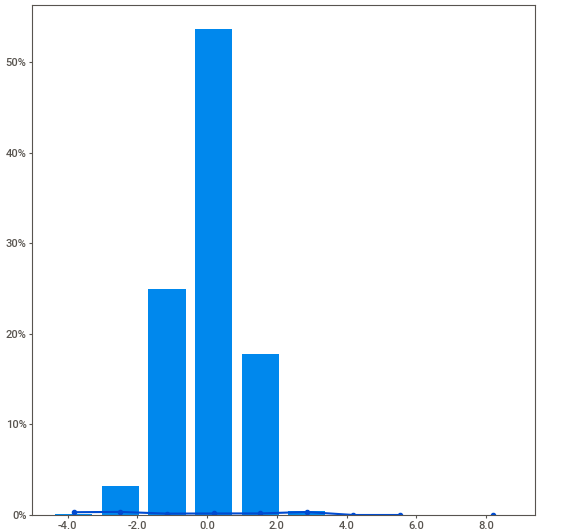
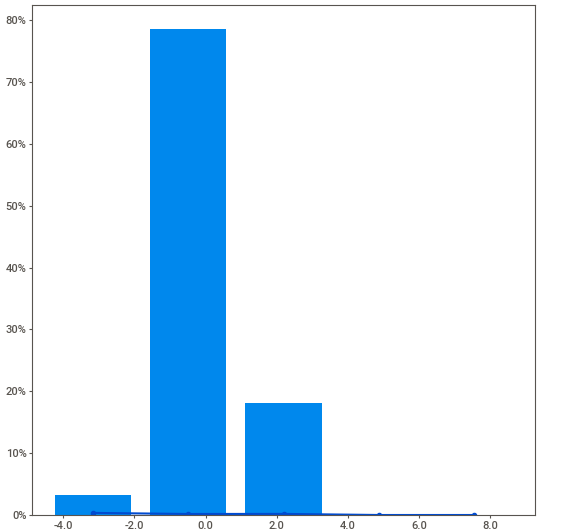
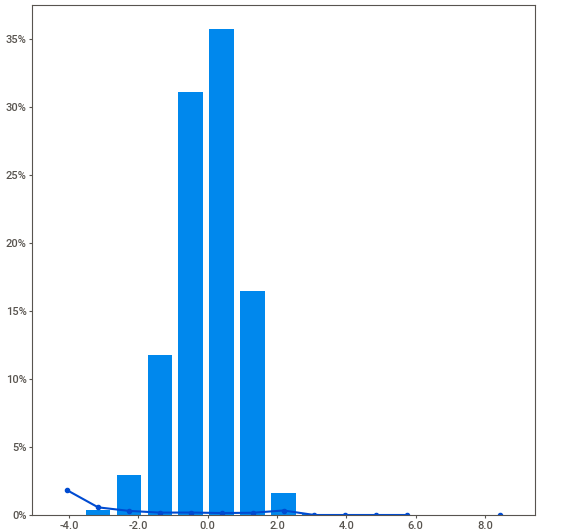
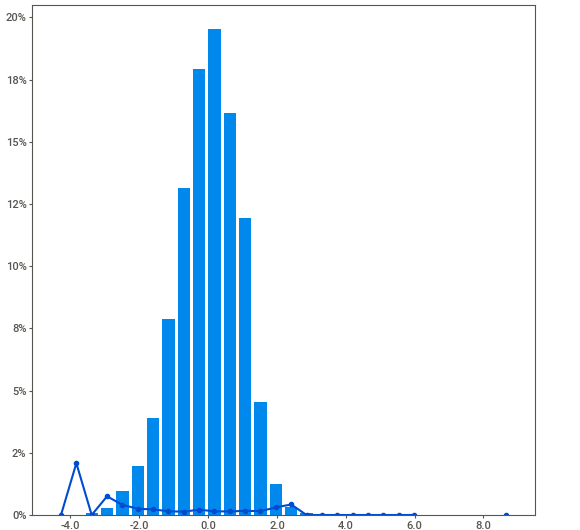
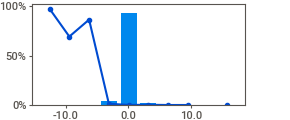
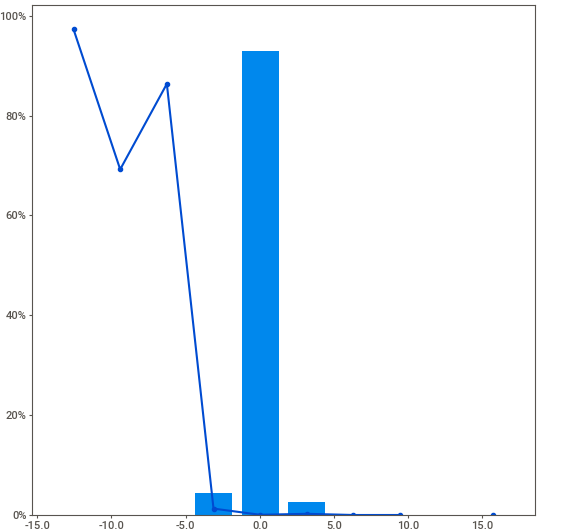
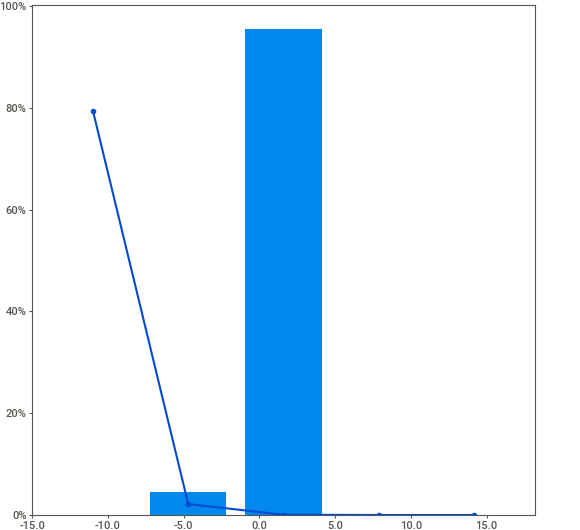
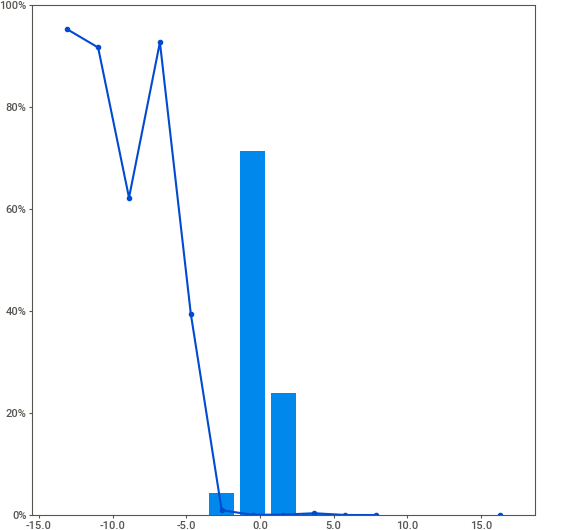
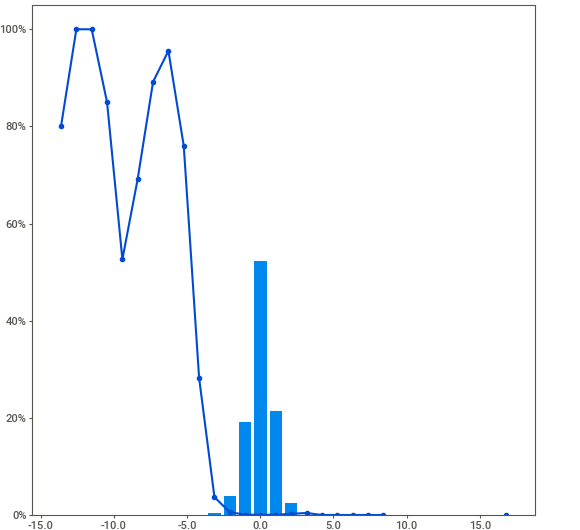
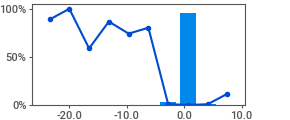
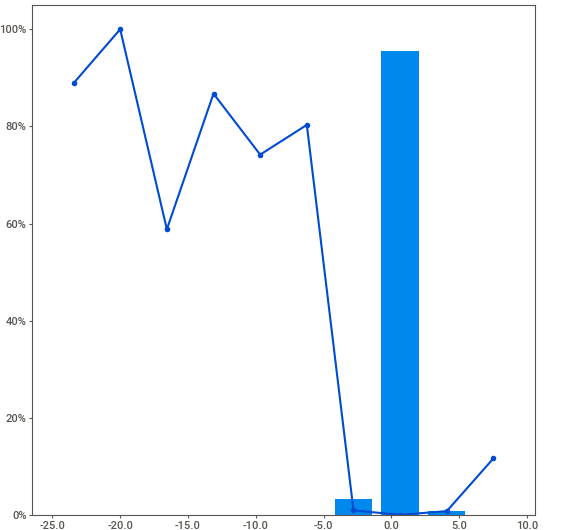
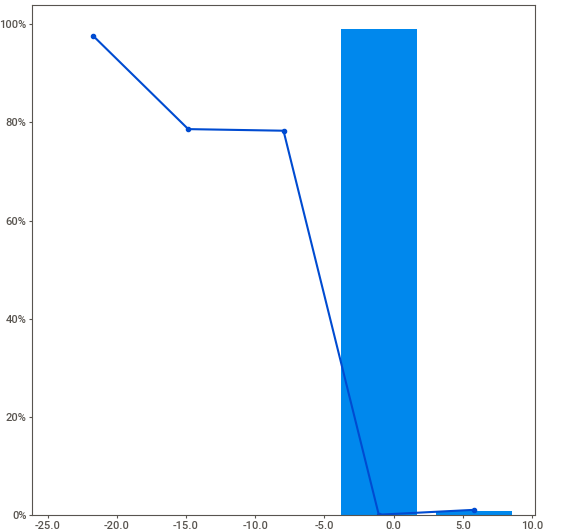
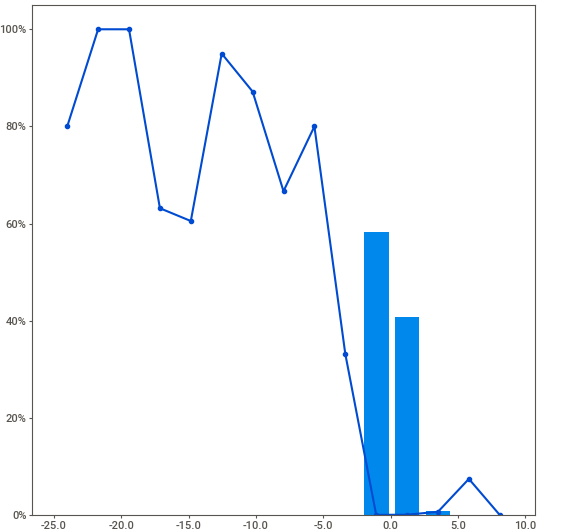
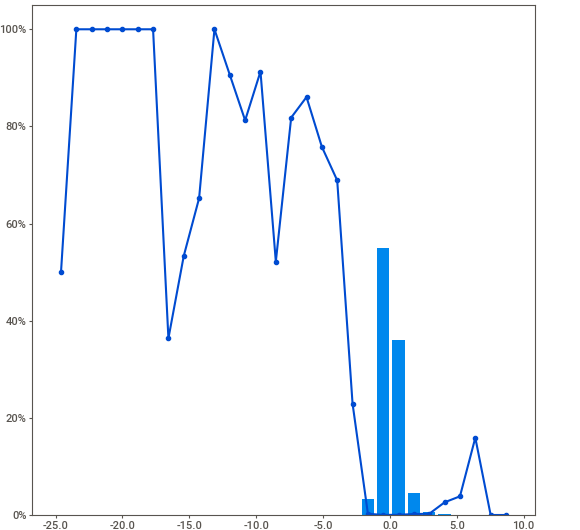
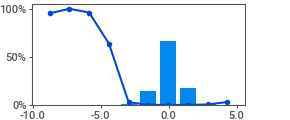
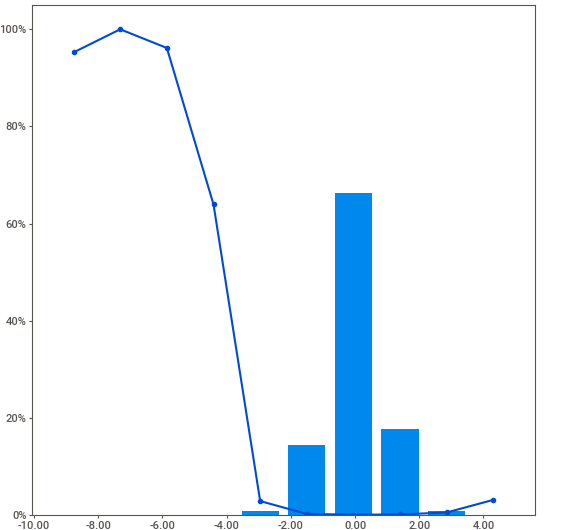
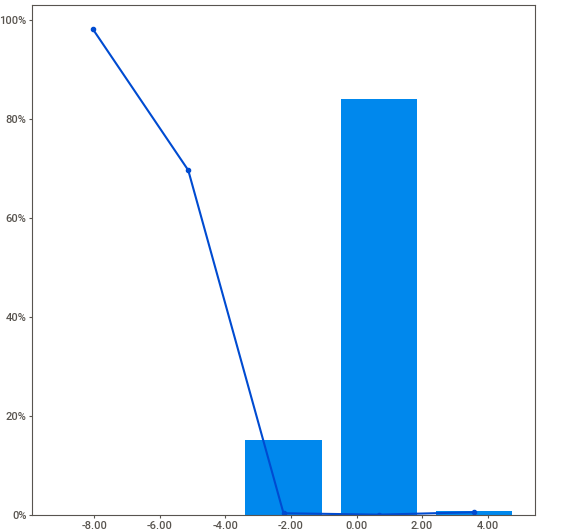
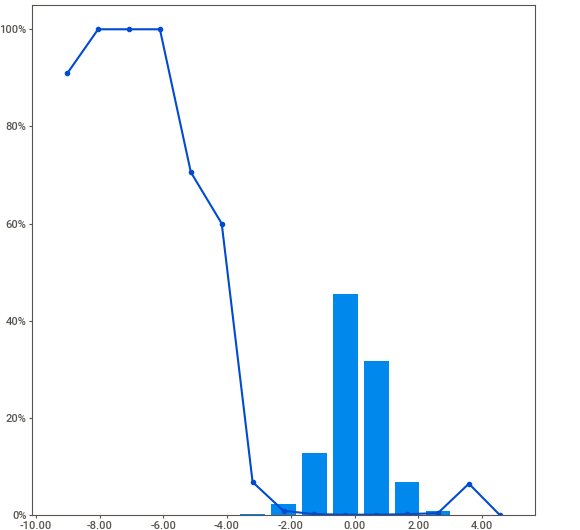
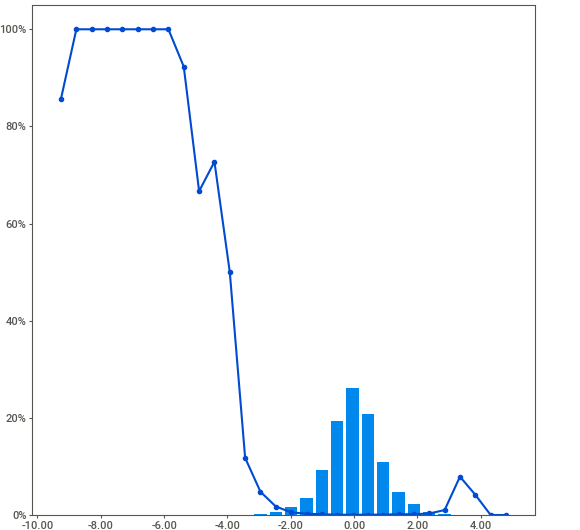
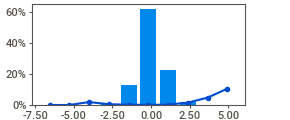
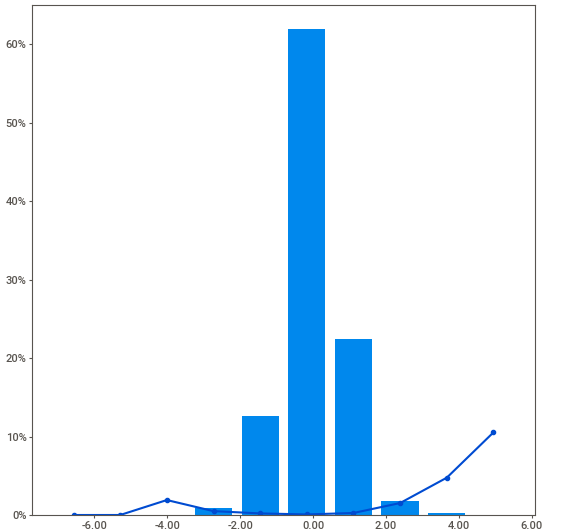
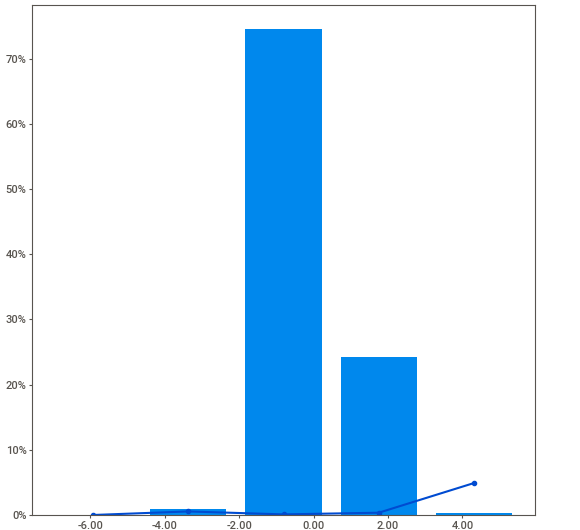
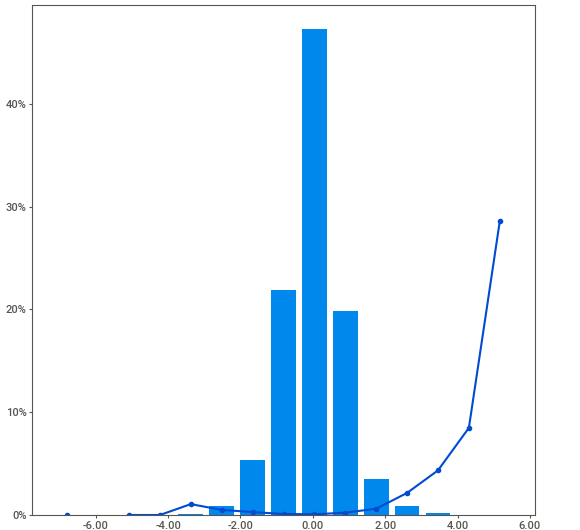
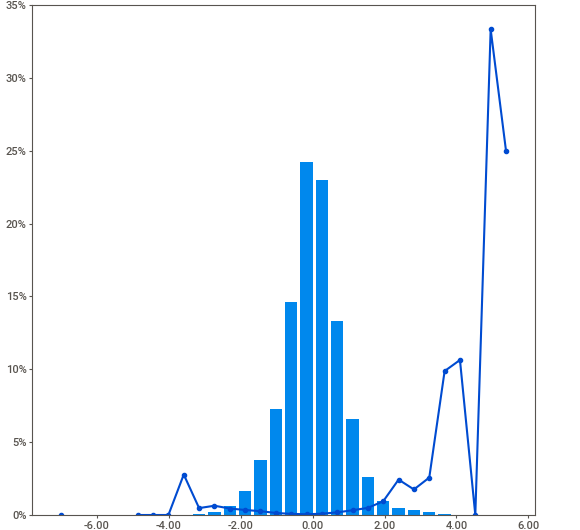
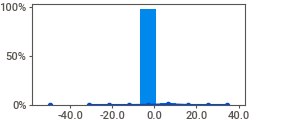
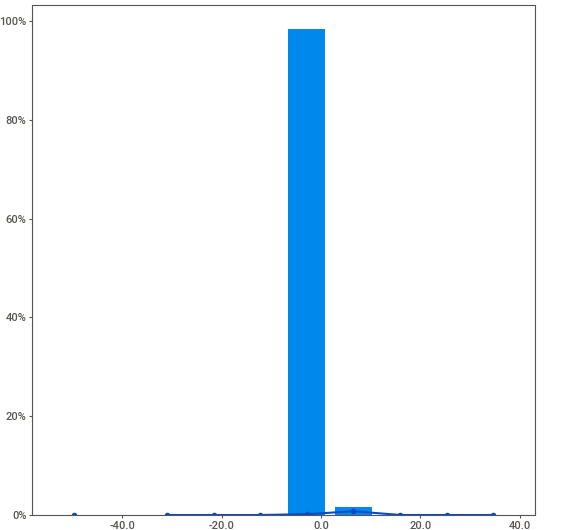
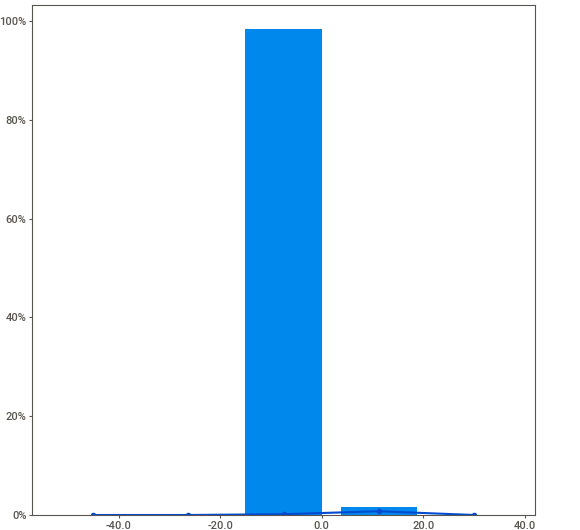
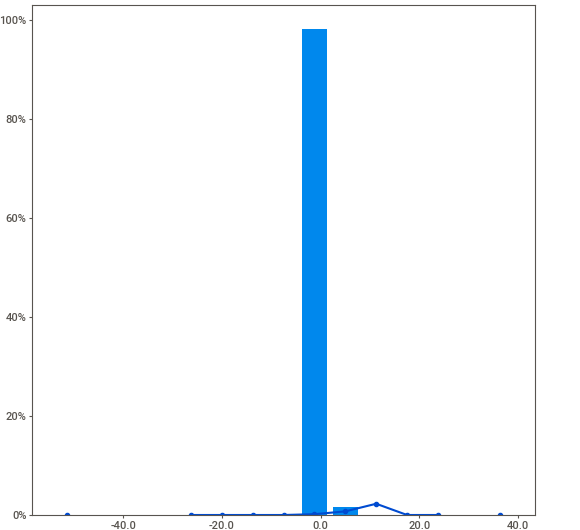
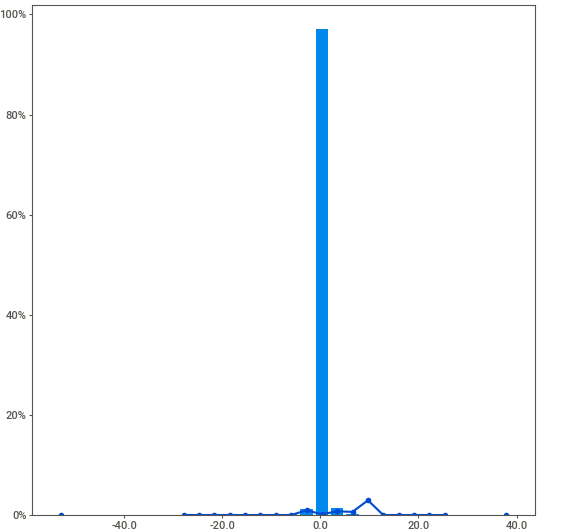
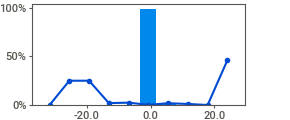
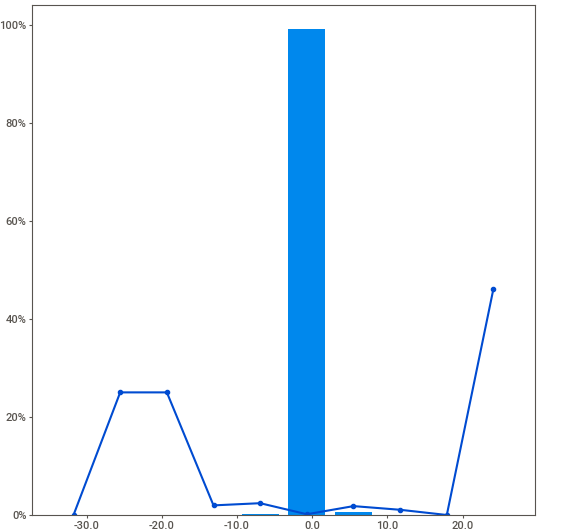
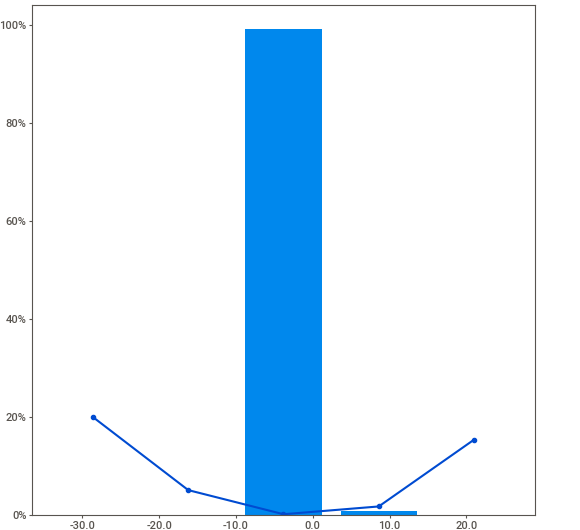
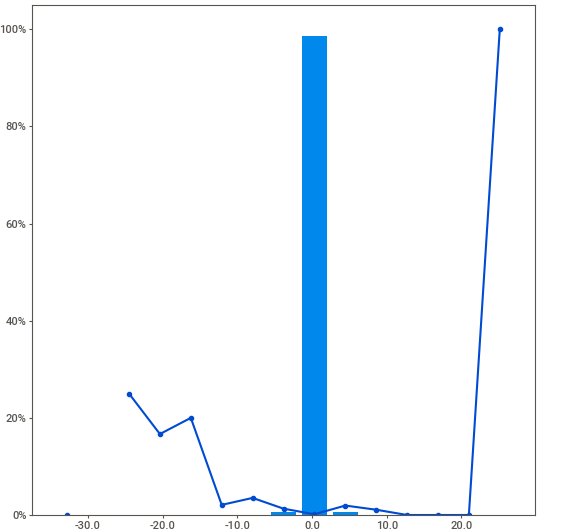
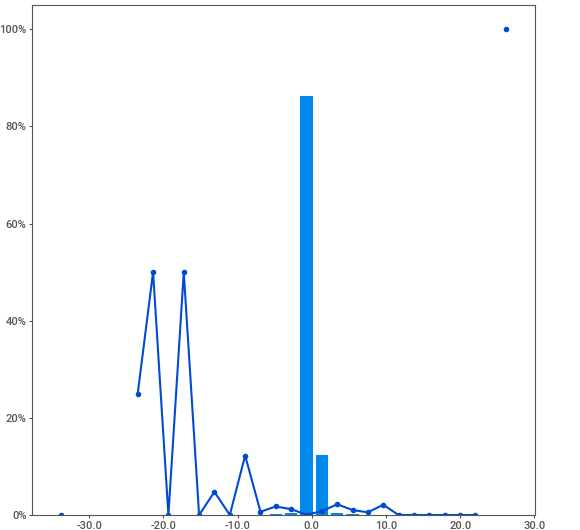
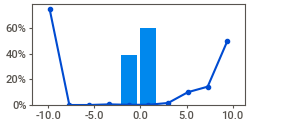
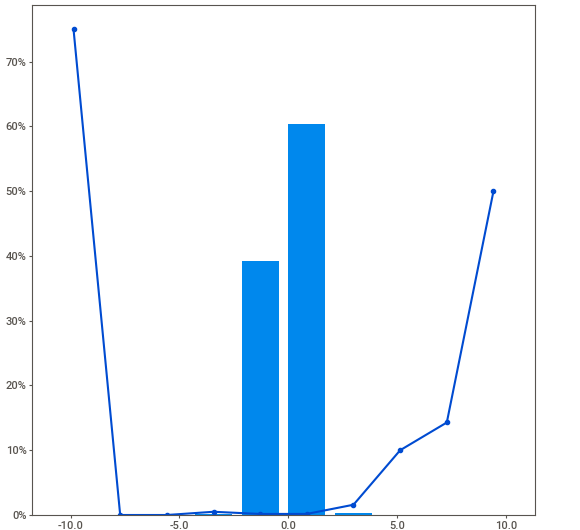
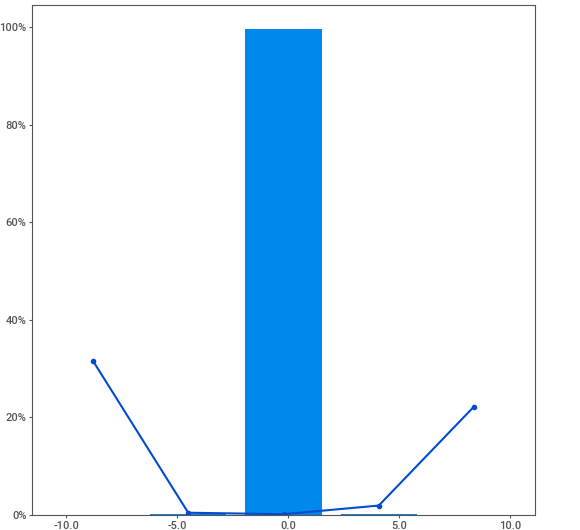
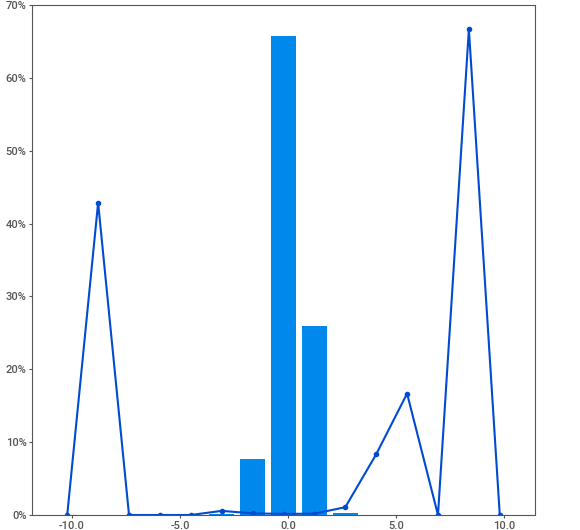
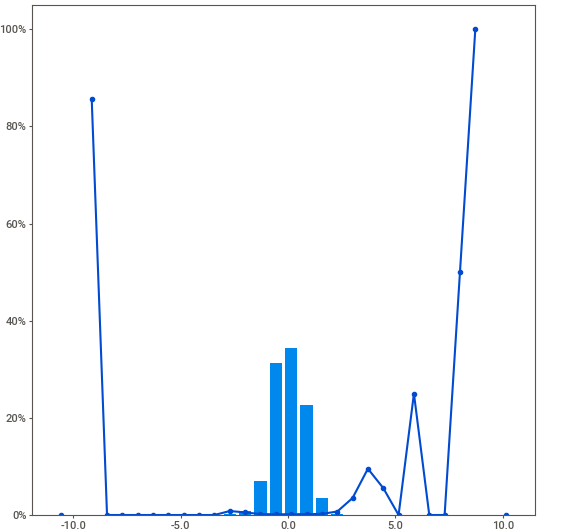
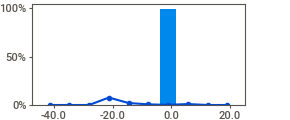
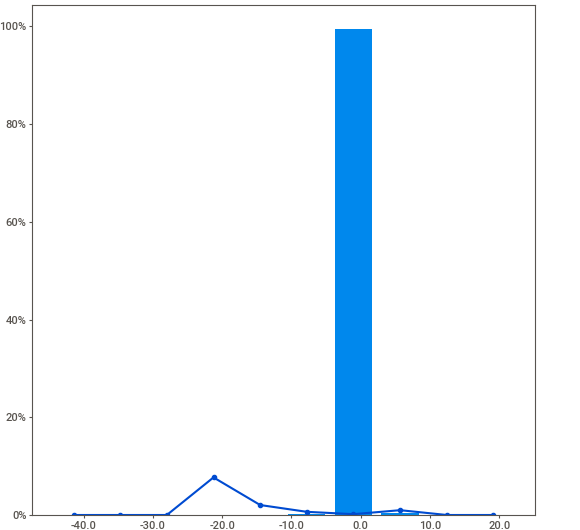
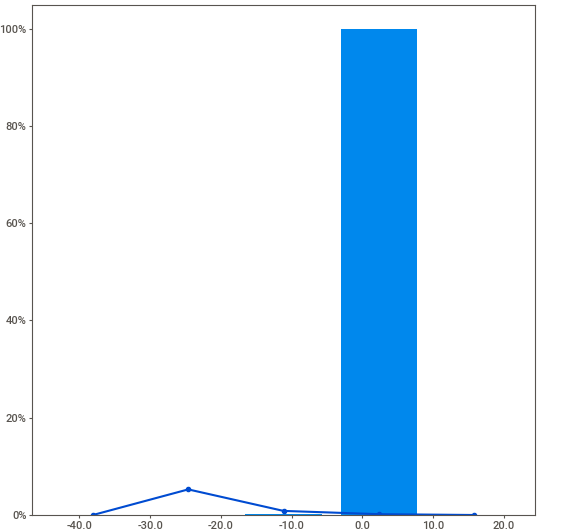
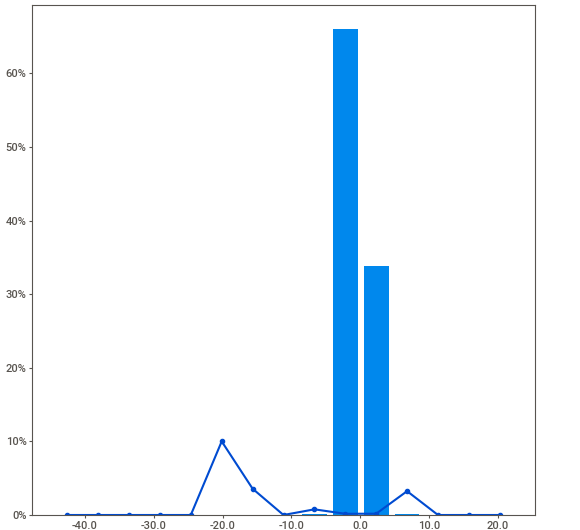
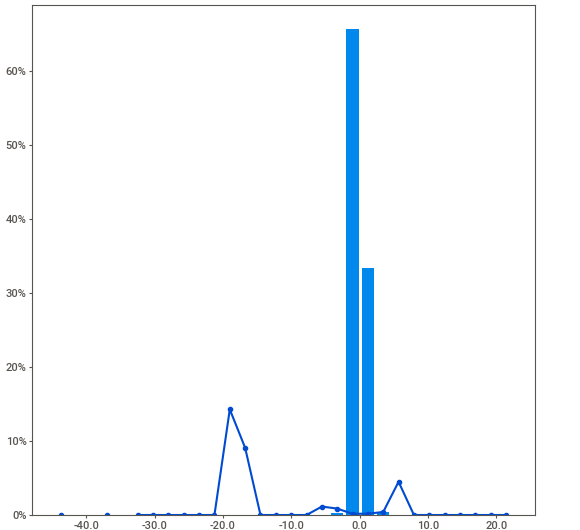
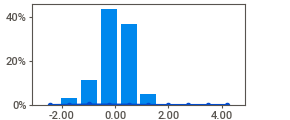
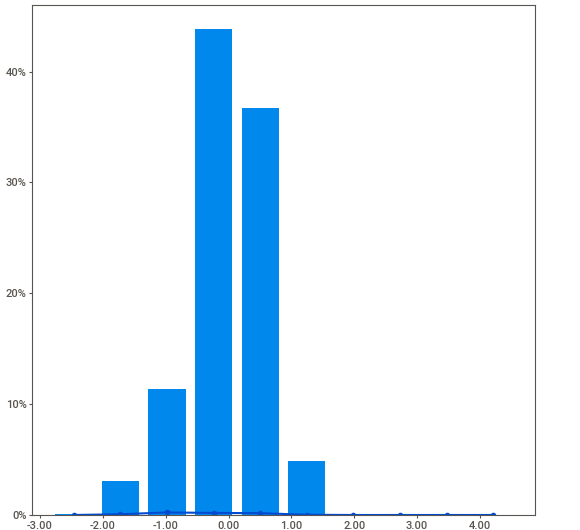
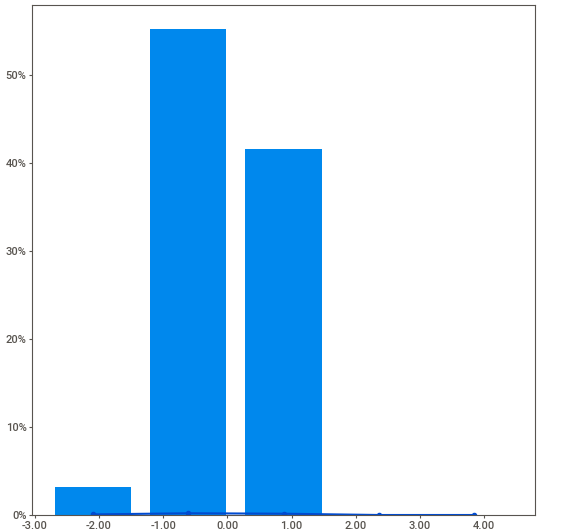
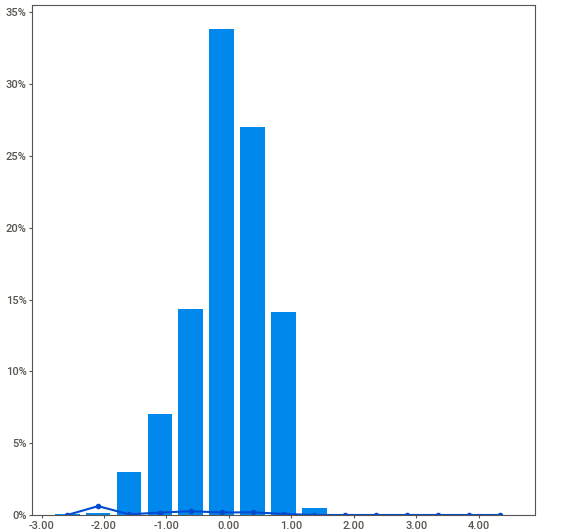
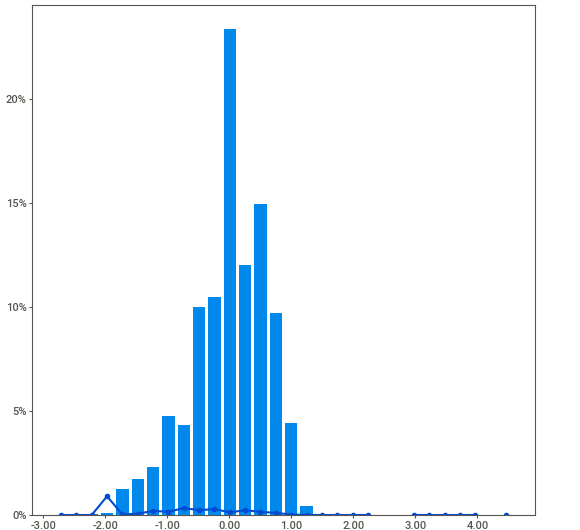
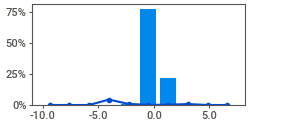
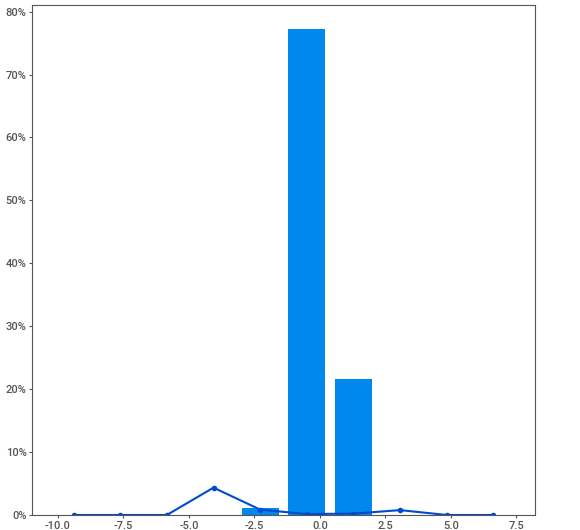
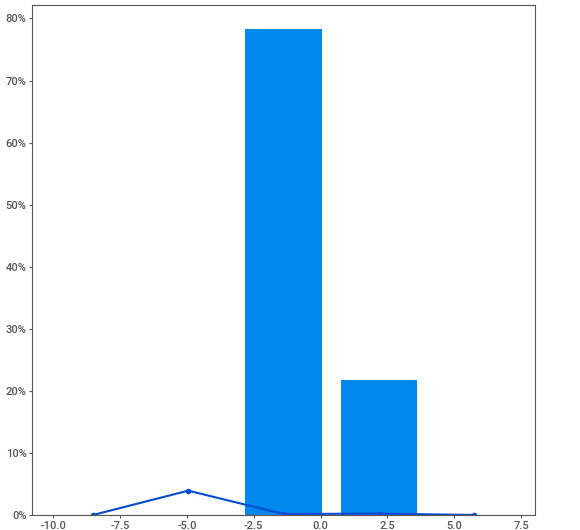
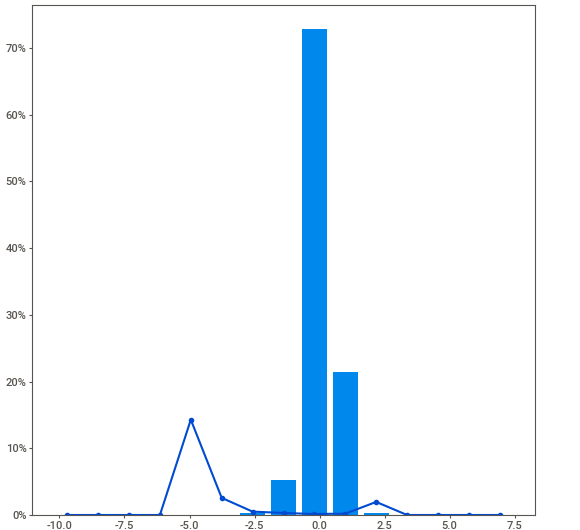
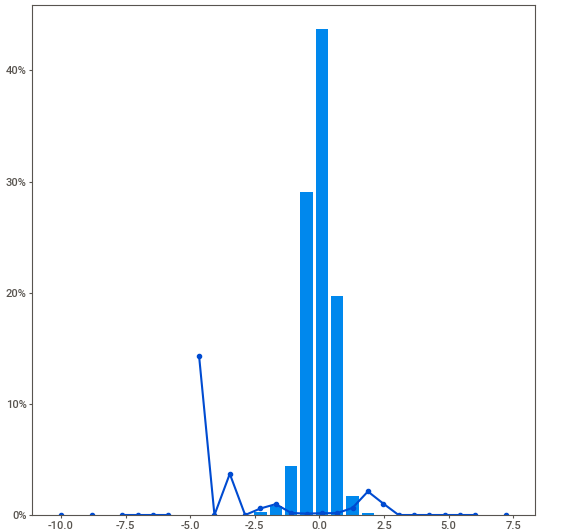
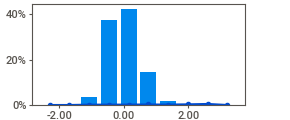
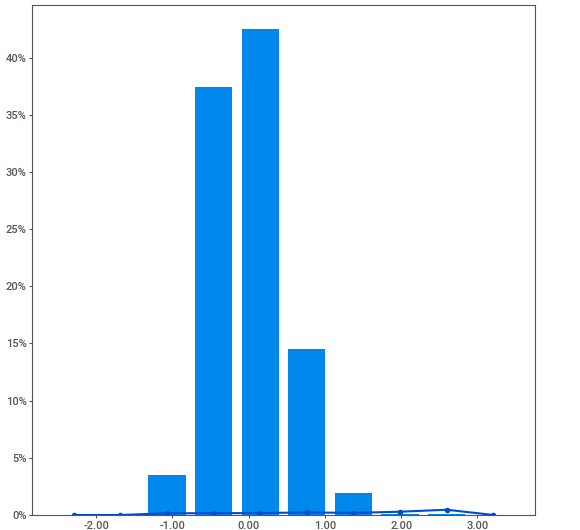
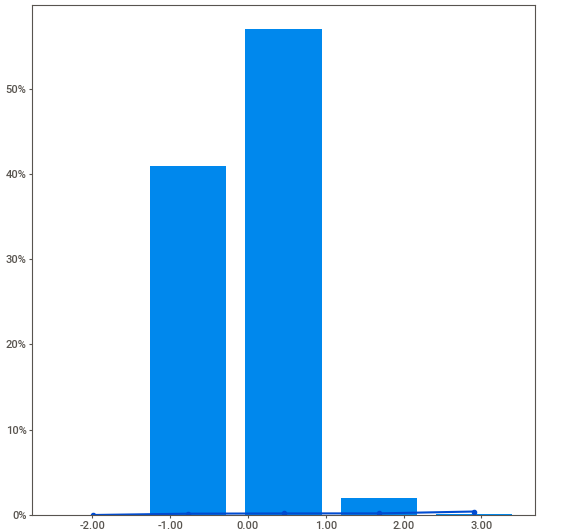
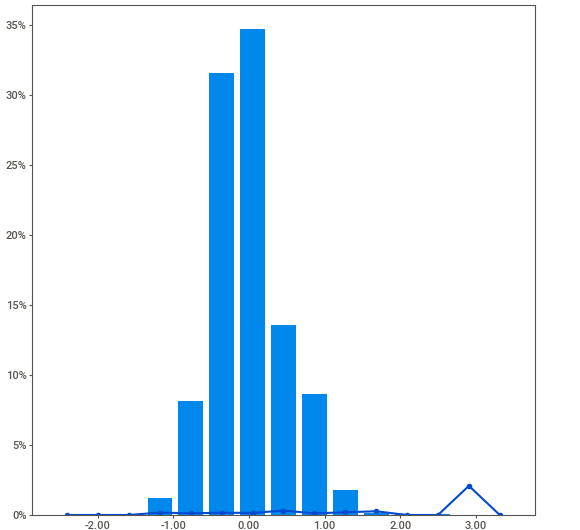
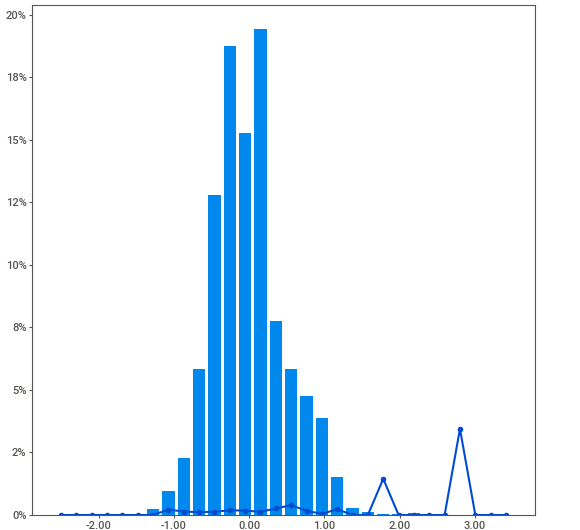
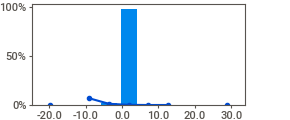
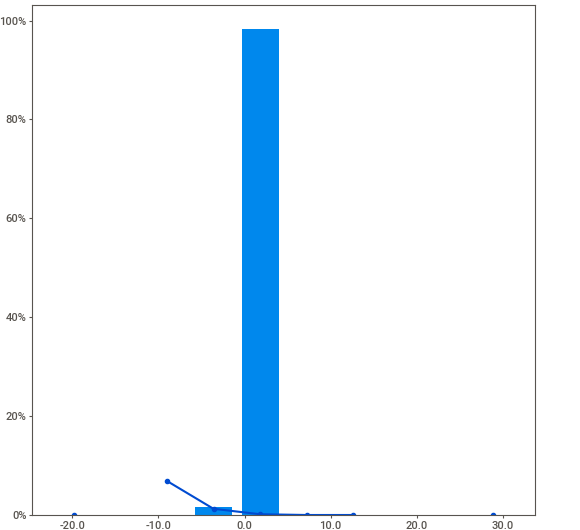
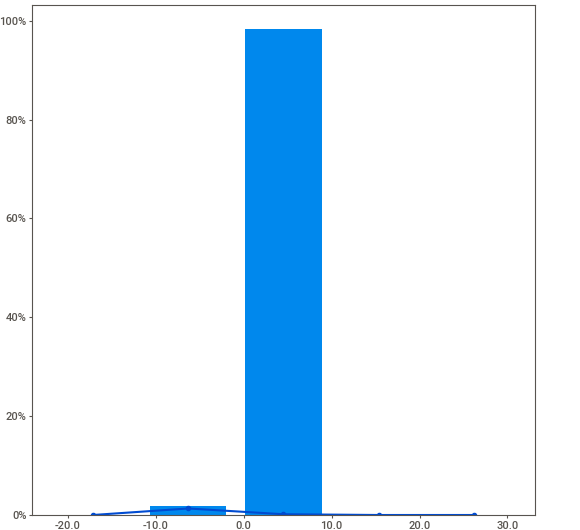
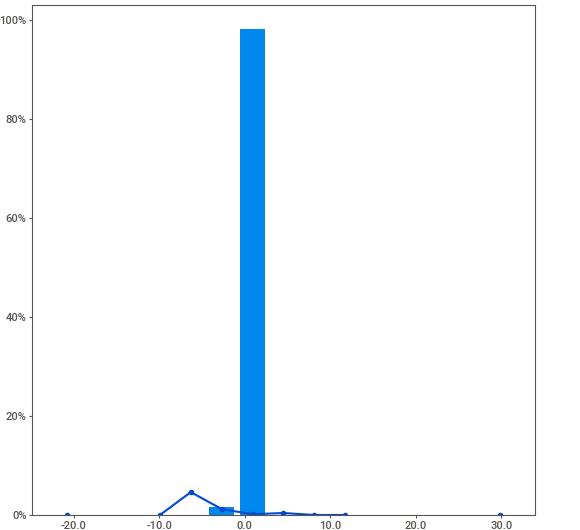
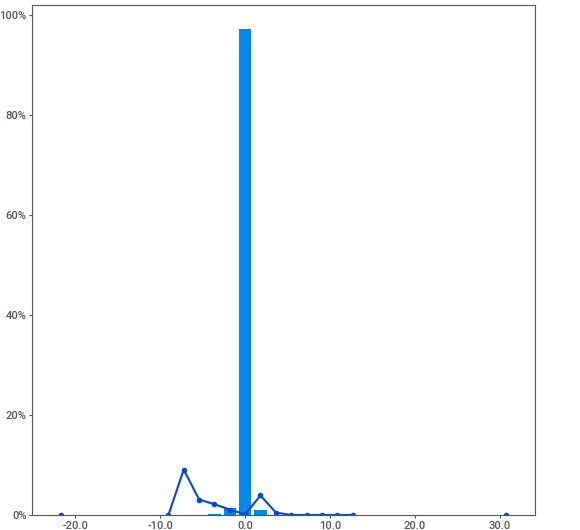
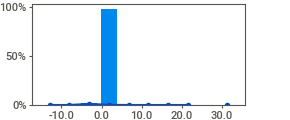
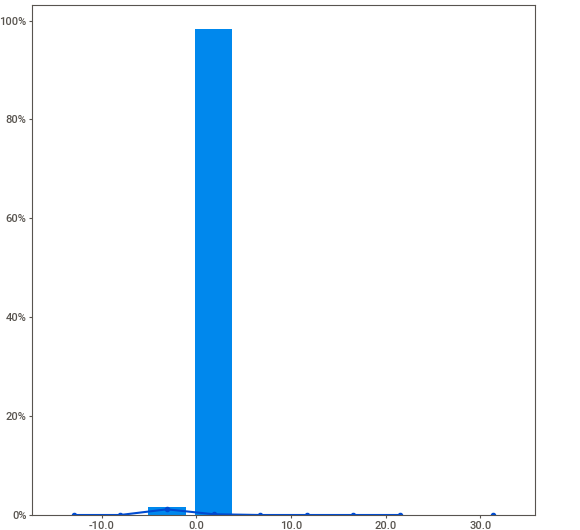
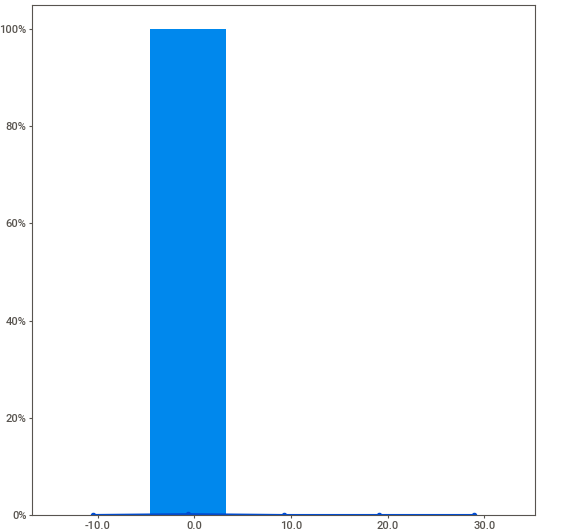
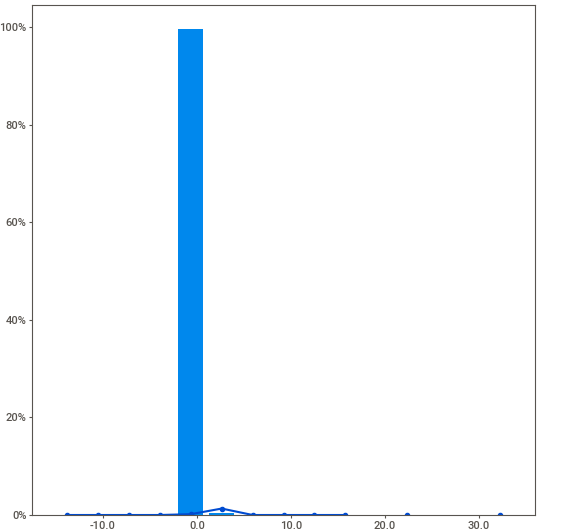
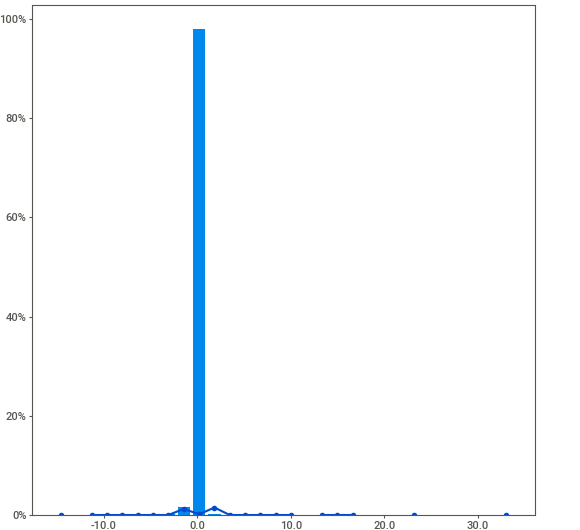
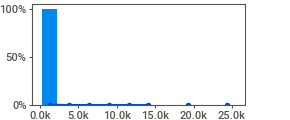
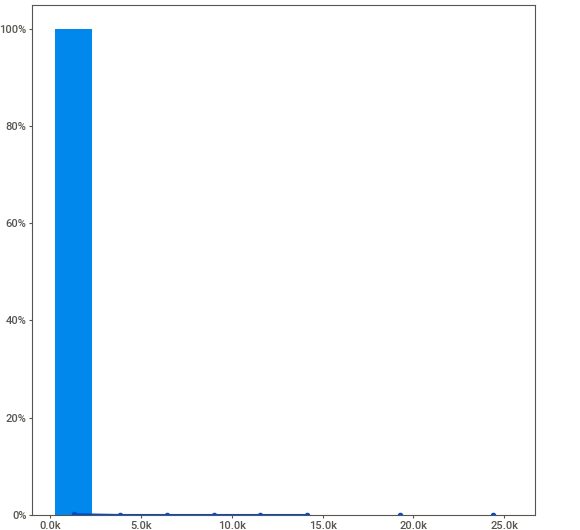
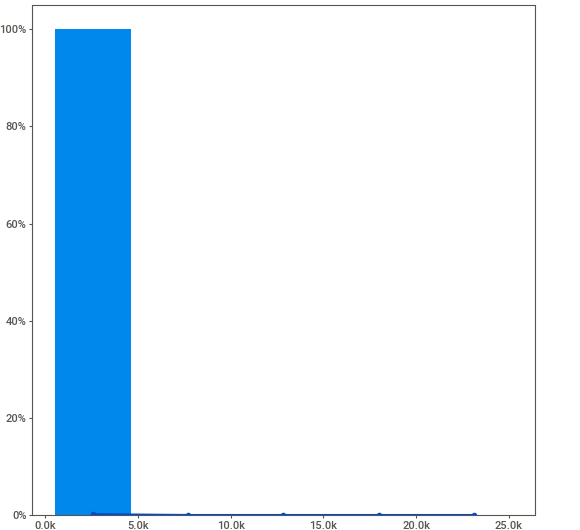
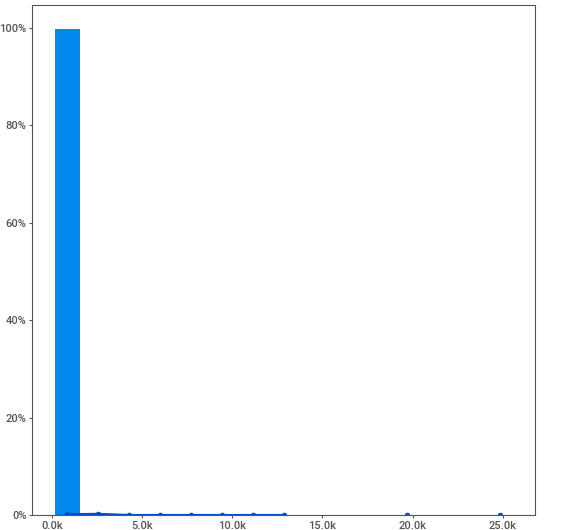
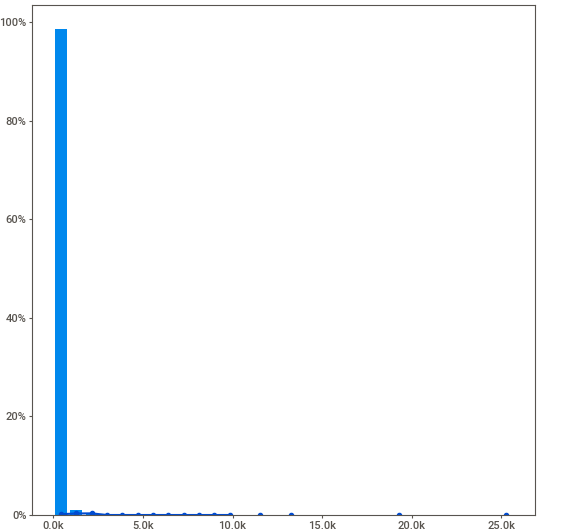
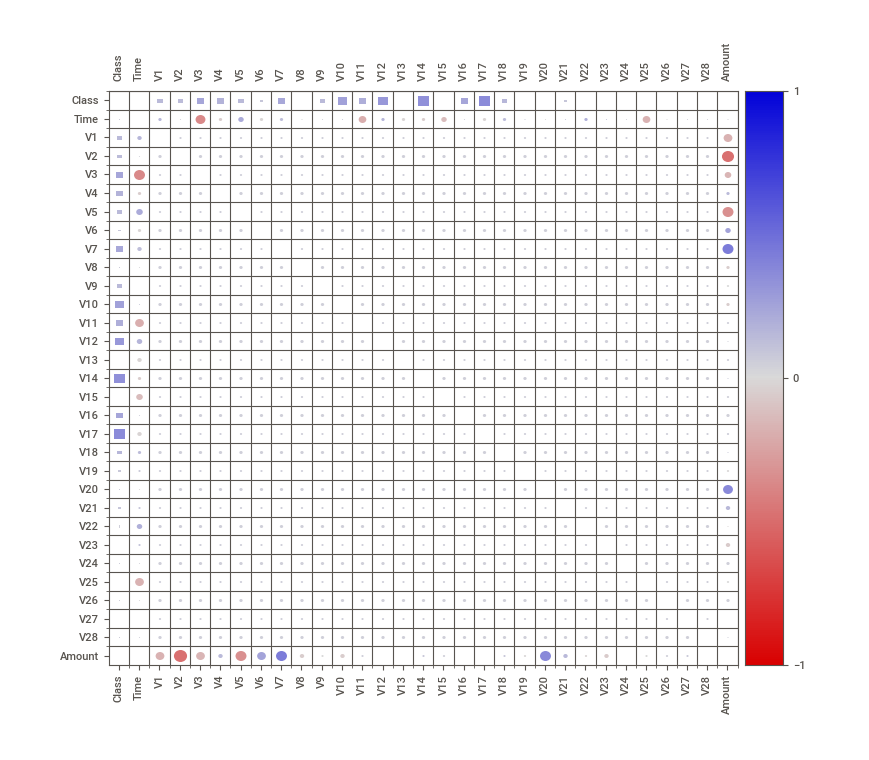
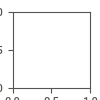

In [8]:
# Analise exploratória simples com Sweetviz
eda = sv.analyze(source = dados, target_feat = 'Class')
eda.show_notebook()


---
# ◾ **Etapa 3.** Pré-processamento dos Dados

Vamos fazer uma modelagem utilizando **Árvores de Decisão**. 

Árvores são excelentes modelos para serem utilizados em uma primeira análise e começar a sentir o conjunto de dados. 

Uma árvore bem ajustada é um algoritmo que costuma oferecer boa performance preditiva.

Além disso, as árvores são robustas em relação a escala das variáveis. 

Portanto, nesse momento, nenhum pré-processamento será feito. 

---
# ◾ **Etapa 4.** Processo de Modelagem

In [9]:
# Separando as variáveis independentes e o target
X = dados.drop('Class', axis = 1)
y = dados['Class']

In [10]:
# separando em treino e teste
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = .2, stratify = y, random_state = 333)

dadosTreino = pd.concat([Xtreino, ytreino], axis = 1)
dadosTeste = pd.concat([Xteste, yteste], axis = 1)


In [11]:
# utilizando um método de cross validation para treinar melhor o modelo
validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

In [12]:
# função de treino e teste do modelo, fazendo um tunning de hiperparâmetros com o RandomizedSearchCV
def Modelagem(Treino, Teste, nome = 'experimento', iteracoes = 2):
   
    Xtreino = Treino.drop('Class', axis = 1)
    ytreino = Treino['Class']    
    
    Xteste = Teste.drop('Class', axis = 1)
    yteste = Teste['Class']

    parametros = {  'criterion': ['gini', 'entropy'],
                    'max_depth' :[2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                    'min_samples_split': [10, 20, 30, 40, 50], 
                    }

    modelo = DecisionTreeClassifier()

    arvore = RandomizedSearchCV(modelo, 
                            param_distributions = parametros,
                            scoring = 'f1', 
                            cv = validacao,
                            n_iter = iteracoes, 
                            n_jobs = -1)


    arvore.fit(Xtreino, ytreino)

    predicoes = arvore.predict(Xteste)

    acc = accuracy_score(predicoes, yteste)
    sen = recall_score(predicoes, yteste)
    pre = precision_score(predicoes, yteste)
    f1s = f1_score(predicoes, yteste)
    auc = roc_auc_score(predicoes, yteste)

    medidas = {'Acurácia': [acc], 'Sensibilidade': [sen], 'Precisão': [pre], 'F1-Score': [f1s], 'AUC': [auc]}

    print(classification_report(predicoes, yteste, digits = 4)[:220])

    print('Matriz de Confusão:\n\n', confusion_matrix(predicoes, yteste))

    return pd.DataFrame(medidas, index = [nome]).round(4), arvore

In [13]:
# visualização do relatório das métricas do modelo e a matriz de confusão com dados desbalanceados  
arvore = Modelagem(dadosTreino, dadosTeste, 'Árvore Simples', 10)

              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9997     56883
           1     0.7551    0.9367    0.8362        79

    accuracy                         0.9995     56962
  
Matriz de Confusão:

 [[56859    24]
 [    5    74]]


In [48]:
# métricas de avaliação para o modelo de arvore de decisão com dados desbalanceados
arvore[0]

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Árvore Simples,0.9995,0.9367,0.7551,0.8362,0.9681


Com já esperado a precisão do modelo não foi tão boa por motivo dos desbalanceamento dos dados.

## ◽ Solucionando o desbalanceamento dos dados  com Undersampling e Oversampling para melhor performance do modelo

◽ Undersampling é técnica que que diminui os dados em maior quantidade para ◽◽◽deixar igual ou mais próximo aos dados com menor quantidade.

◽ Oversmapling é técnica que replica os dados em menor quantidade para deixar igual ou mais próximo dos dados em maior quantidade.

## ◽ **Undersampling**

In [15]:
# função para undersampling 

def UnderSampling(dados, under = 1):
    classe0 = dados[dados['Class'] == 0]
    classe1 = dados[dados['Class'] == 1]  
    
    amostra0 = classe0.sample(under * classe1.shape[0])
    under = pd.concat([amostra0, classe1])

    return under

#### Vamos fazer o undersampling em 4 amostras de dados

In [16]:
# Quantidade de valores 0 e 1 da amostra para o undersampling 1
under1 = UnderSampling(dadosTreino, 1)  
under1['Class'].value_counts()/under1.shape[0]

0    0.5
1    0.5
Name: Class, dtype: float64

In [17]:
# Classificação com a técnica de undersampling 1 

u1 = Modelagem(under1, dadosTeste, 'UnderSampling 1:1', 10)

              precision    recall  f1-score   support

           0     0.9556    0.9998    0.9772     54349
           1     0.8776    0.0329    0.0634      2613

    accuracy                         0.9554     56962
  
Matriz de Confusão:

 [[54337    12]
 [ 2527    86]]


In [18]:
# Quantidade de valores 0 e 1 da amostra para o undersampling 2

under2 = UnderSampling(dadosTreino, 3)  
under2['Class'].value_counts()/under2.shape[0]

0    0.75
1    0.25
Name: Class, dtype: float64

In [19]:
# Classificação com a técnica de undersampling 2 

u2 = Modelagem(under2, dadosTeste, 'UnderSampling 3:1', 10)

              precision    recall  f1-score   support

           0     0.9914    0.9997    0.9955     56394
           1     0.8163    0.1408    0.2402       568

    accuracy                         0.9911     56962
  
Matriz de Confusão:

 [[56376    18]
 [  488    80]]


In [20]:
# Quantidade de valores 0 e 1 da amostra para o undersampling 3

under3 = UnderSampling(dadosTreino, 9)  
under3['Class'].value_counts()/under3.shape[0]

0    0.9
1    0.1
Name: Class, dtype: float64

In [21]:
# Classificação com a técnica de undersampling 3

u3 = Modelagem(under3, dadosTeste, 'UnderSampling 9:1', 10)

              precision    recall  f1-score   support

           0     0.9982    0.9997    0.9990     56781
           1     0.8163    0.4420    0.5735       181

    accuracy                         0.9979     56962
  
Matriz de Confusão:

 [[56763    18]
 [  101    80]]


In [22]:
# Quantidade de valores 0 e 1 da amostra para o undersampling 4

under4 = UnderSampling(dadosTreino, 99)  
under4['Class'].value_counts()/under4.shape[0]

0    0.99
1    0.01
Name: Class, dtype: float64

In [23]:
# Classificação com a técnica de undersampling 4

u4 = Modelagem(under4, dadosTeste, 'UnderSampling 99:1', 10)

              precision    recall  f1-score   support

           0     0.9991    0.9996    0.9994     56835
           1     0.7959    0.6142    0.6933       127

    accuracy                         0.9988     56962
  
Matriz de Confusão:

 [[56815    20]
 [   49    78]]


## ◽ **Oversampling**

In [24]:
# função de oversampling 

def UnderOverSampling(dados, under = 1, over = 1):
    classe0 = dados[dados['Class'] == 0]
    classe1 = dados[dados['Class'] == 1]  

    amostra0 = classe0.sample(under * classe1.shape[0])
    amostra1 = pd.concat([classe1] * over, ignore_index=True)
    tudo = pd.concat([amostra0, amostra1])

    return tudo

#### Vamos fazer o oversampling com 6 amostras desta vez

In [25]:
# Amostra 1 

over1 = UnderOverSampling(dadosTreino, under = 90, over = 10)
over1['Class'].value_counts()/over1.shape[0]

0    0.9
1    0.1
Name: Class, dtype: float64

In [26]:
# Classificação com o oversampling 1 

o1 = Modelagem(over1, dadosTeste, 'OverSampling 10x 9:1', 10)

              precision    recall  f1-score   support

           0     0.9977    0.9997    0.9987     56751
           1     0.8061    0.3744    0.5113       211

    accuracy                         0.9973     56962
  
Matriz de Confusão:

 [[56732    19]
 [  132    79]]


In [27]:
# Amostra 2 

over2 = UnderOverSampling(dadosTreino, under = 75, over = 25)
over2['Class'].value_counts()/over2.shape[0]

0    0.75
1    0.25
Name: Class, dtype: float64

In [28]:
# Classificação com o oversampling 2

o2 = Modelagem(over2, dadosTeste, 'OverSampling 25x 3:1', 5)

              precision    recall  f1-score   support

           0     0.9962    0.9996    0.9979     56666
           1     0.7959    0.2635    0.3959       296

    accuracy                         0.9958     56962
  
Matriz de Confusão:

 [[56646    20]
 [  218    78]]


In [29]:
# Amostra 3

over3 = UnderOverSampling(dadosTreino, under = 50, over = 50)
over3['Class'].value_counts()/over3.shape[0]

0    0.5
1    0.5
Name: Class, dtype: float64

In [30]:
# Classificação com o oversampling 3

o3 = Modelagem(over3, dadosTeste, 'OverSampling 50x 1:1', 5)

              precision    recall  f1-score   support

           0     0.9864    0.9996    0.9930     56113
           1     0.7959    0.0919    0.1647       849

    accuracy                         0.9861     56962
  
Matriz de Confusão:

 [[56093    20]
 [  771    78]]


In [31]:
# Amostra 4

over4 = UnderOverSampling(dadosTreino, under = 450, over = 50)
over4['Class'].value_counts()/over4.shape[0]

0    0.9
1    0.1
Name: Class, dtype: float64

In [32]:
# Quantidade de valores que correspondem a 90% de valores 0 (não-fraudes)

over4.shape[0]

197000

In [33]:
# Classificação com o oversampling 4

o4 = Modelagem(over4, dadosTeste, 'OverSampling 50x 9:1', 5)

              precision    recall  f1-score   support

           0     0.9992    0.9996    0.9994     56842
           1     0.7653    0.6250    0.6881       120

    accuracy                         0.9988     56962
  
Matriz de Confusão:

 [[56819    23]
 [   45    75]]


In [34]:
# Resumo dos hiperparÂmetros utilizados pelo modelo com o oversampling 4 

o4

(                      Acurácia  Sensibilidade  Precisão  F1-Score     AUC
 OverSampling 50x 9:1    0.9988          0.625    0.7653    0.6881  0.8123,
 RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None),
                    estimator=DecisionTreeClassifier(), n_iter=5, n_jobs=-1,
                    param_distributions={'criterion': ['gini', 'entropy'],
                                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10, 12],
                                         'min_samples_split': [10, 20, 30, 40,
                                                               50]},
                    scoring='f1'))

In [35]:
# Amostra 5

over5 = UnderOverSampling(dadosTreino, under = 475, over = 25)
over5['Class'].value_counts()/over5.shape[0]

0    0.95
1    0.05
Name: Class, dtype: float64

In [36]:
# Classificação com o oversampling 5

o5 = Modelagem(over5, dadosTeste, 'OverSampling 25x 20:1', 5)

              precision    recall  f1-score   support

           0     0.9994    0.9996    0.9995     56851
           1     0.7857    0.6937    0.7368       111

    accuracy                         0.9990     56962
  
Matriz de Confusão:

 [[56830    21]
 [   34    77]]


In [37]:
# Amostra 6

over6 = UnderOverSampling(dadosTreino, under = 490, over = 10)
over6['Class'].value_counts()/over6.shape[0]

0    0.98
1    0.02
Name: Class, dtype: float64

In [38]:
# Classificação com o oversampling 6

o6 = Modelagem(over6, dadosTeste, 'OverSampling 10x 50:1', 5)

              precision    recall  f1-score   support

           0     0.9995    0.9996    0.9995     56858
           1     0.7449    0.7019    0.7228       104

    accuracy                         0.9990     56962
  
Matriz de Confusão:

 [[56833    25]
 [   31    73]]


In [39]:
# Colocando todos os valores das métricas de avaliação do modelo de todas as amostras de oversampling e undersampling

pd.concat([arvore[0], u1[0], u2[0], u3[0], u4[0], o1[0], o2[0], o3[0], o4[0], o5[0], o6[0]])

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Árvore Simples,0.9995,0.9367,0.7551,0.8362,0.9681
UnderSampling 1:1,0.9554,0.0329,0.8776,0.0634,0.5163
UnderSampling 3:1,0.9911,0.1408,0.8163,0.2402,0.5703
UnderSampling 9:1,0.9979,0.4420,0.8163,0.5735,0.7208
UnderSampling 99:1,0.9988,0.6142,0.7959,0.6933,0.8069
OverSampling 10x 9:1,0.9973,0.3744,0.8061,0.5113,0.6870
OverSampling 25x 3:1,0.9958,0.2635,0.7959,0.3959,0.6316
OverSampling 50x 1:1,0.9861,0.0919,0.7959,0.1647,0.5458
OverSampling 50x 9:1,0.9988,0.6250,0.7653,0.6881,0.8123
OverSampling 25x 20:1,0.9990,0.6937,0.7857,0.7368,0.8467


## ◽ **Ajuste do Ponto de Corte**

In [49]:
propensoes = arvore[1].predict_proba(Xteste)[:,1]

precision, recall, thresholds = precision_recall_curve(yteste, propensoes)

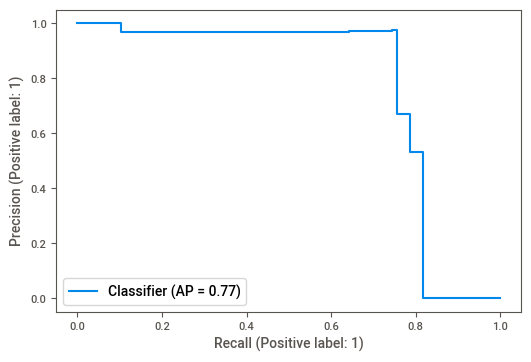

In [41]:
# curva de precision/recall (o melhor valor da métrica seria a interseção os eixos x e y tem maior valor)

PrecisionRecallDisplay.from_predictions(yteste, propensoes)
plt.show()

In [42]:
#custos
s = 1
p = 2

aux = pd.DataFrame({ 'Sensibilidade': recall[1:], 'Precisao': precision[1:], 'Corte': thresholds })
aux['Custo'] = (p*aux['Precisao'] + s*aux['Sensibilidade'])/(p+s)
aux.sort_values(by = 'Custo', ascending = False)

,Sensibilidade,Precisao,Corte,Custo
6,0.755102,0.973684,0.800000,0.900823
7,0.744898,0.973333,0.888889,0.897188
5,0.755102,0.961039,0.777778,0.892393
4,0.755102,0.936709,0.137931,0.876173
8,0.642857,0.969231,0.943396,0.860440
3,0.755102,0.880952,0.039216,0.839002
2,0.755102,0.698113,0.035714,0.717109
1,0.785714,0.669565,0.006289,0.708282
9,0.102041,1.000000,0.960976,0.700680
10,0.000000,1.000000,1.000000,0.666667


Demos um peso da precisão de 2 e de recall (sensibilidade) de 1, pois neste caso para fraudes é bem mais interessante utilizar a precisão para que quando o modelo classifica como fraude tenha uma melhor porcentagem de realmente ser fraude. Desta forma o modelo 6 de oversampling seria a melhor a opção de escolha com melhores predições. 

---
# ◾ **Etapa 5. Considerações Finais**

## ◽ **Conclusões** 
- Consertar o problema de desbalanceamento não é fácil!
- As abordagens apresentadas oferecem modelos diferentes, mas não necessariamente melhores. 
- A análise do ponto de corte pode melhorar bastante os resultados obtidos, permitindo uma escolha mais adequada para o contexto de negócios. 

## ◽ **Continuação do Projeto** 

Neste projeto testamos técnicas de undersmapling e oversampling manuais, porém existem modelos prontos que fazem este trabalho muito mais fácil. Outro ponto, existem modelos classificação muito mais robustos para este projeto, o o modelo utlizado aqui foi bem simples, e também o pré-processamneto foi bem superficial, podemos elaborar e melhorar muito mais este projeto utilizando melhores técnicas. Este projeto teve o objetivo apenas de demonstrar como dados desbalanceados podem interferir na performance de modelos de Machine learning.

- NearMiss (undersampling) e SMOTE (oversampling)
- Outras tipos de modelos
- Pré-processamento mais aprofundado
